<a href="https://colab.research.google.com/github/andrix17/proWine/blob/main/notebook/ProWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ProWine Project
## Analisi Descrittiva
Script R per analisi descrittiva delle varietà dei vini usando un dataset di recensioni preso da Kaggle https://www.kaggle.com/zynicide/wine-reviews

In [2]:
install.packages("lsa")
install.packages("tm")
install.packages("RWeka")
install.packages("stopwords")
library(tm)
library(lsa)
library(RWeka)
library(stopwords)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ISOcodes’


Loading required package: NLP

Loading required package: SnowballC


Attaching package: ‘stopwords’


The following object is masked from ‘package:tm’:

    stopwords




In [3]:
download.file('https://raw.githubusercontent.com/andrix17/proWine/main/dataset/winemag-data-130k-v2.csv?token=AMASMT6SWWUQDUY3EEZJWD3AGZUK6','wineData.csv')

In [4]:
wineData <- read.csv('wineData.csv')

In [5]:
head(wineData)

X country 
1 0 Italy   
2 1 Portugal
3 2 US      
4 3 US      
5 4 US      
6 5 Spain   
  description                                                                                                                                                                                                                                                          
1 Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                                         
2 This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.                                  
3 Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.                                                                           
4 Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.                                                              
5 Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.            
6 Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.
  designation                        points price province         
1 Vulkà Bianco                       87     NA    Sicily & Sardinia
2 Avidagos                           87     15    Douro            
3                                    87     14    Oregon           
4 Reserve Late Harvest               87     13    Michigan         
5 Vintner's Reserve Wild Child Block 87     65    Oregon           
6 Ars In Vitro                       87     15    Northern Spain   
  region_1            region_2          taster_name       
1 Etna                                  Kerin O’Keefe     
2                                       Roger Voss        
3 Willamette Valley   Willamette Valley Paul Gregutt      
4 Lake Michigan Shore                   Alexander Peartree
5 Willamette Valley   Willamette Valley Paul Gregutt      
6 Navarra                               Michael Schachner 
  taster_twitter_handle
1 @kerinokeefe         
2 @vossroger           
3 @paulgwine           
4                      
5 @paulgwine           
6 @wineschach          
  title                                                                              
1 Nicosia 2013 Vulkà Bianco  (Etna)                                                  
2 Quinta dos Avidagos 2011 Avidagos Red (Douro)                                      
3 Rainstorm 2013 Pinot Gris (Willamette Valley)                                      
4 St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)                
5 Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley)
6 Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra)                              
  variety            winery             
1 White Blend        Nicosia            
2 Portuguese Red     Quinta dos Avidagos
3 Pinot Gris         Rainstorm          
4 Riesling           St. Julian         
5 Pinot Noir         Sweet Cheeks       
6 Tempranillo-Merlot Tandem

In [6]:
variety = wineData$variety
reviews = wineData$description
length(variety)==length(reviews)

[1] TRUE

In [7]:
head(sort(table(variety), decreasing = T))

variety
              Pinot Noir               Chardonnay       Cabernet Sauvignon 
                   13272                    11753                     9472 
               Red Blend Bordeaux-style Red Blend                 Riesling 
                    8946                     6915                     5189 

In [8]:
corpus <- Corpus(VectorSource(reviews))
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                             
[2] This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.                      
[3] Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.                                                               
[4] Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled gua

In [9]:
corpus <- tm_map(corpus, tolower)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit, broom, brimstone and dried herb. the palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.                                                                             
[2] this is ripe and fruity, a wine that is smooth while still structured. firm tannins are filled out with juicy red berry fruits and freshened with acidity. it's  already drinkable, although it will certainly be better from 2016.                      
[3] tart and snappy, the flavors of lime flesh and rind dominate. some green pineapple pokes through, with crisp acidity underscoring the flavors. the wine was all stainless-steel fermented.                                                               
[4] pineapple rind, lemon pith and orange blossom start off the aromas. the palate is a bit more opulent, with notes of honey-drizzled gua

In [10]:
stopwordlist <- stopwords::stopwords("en", source= "nltk")#Snowball, marimo, nltk, stopwords-iso, smart
corpus <- tm_map(corpus, removeWords, stopwordlist)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwordlist):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit, broom, brimstone  dried herb.  palate  overly expressive, offering unripened apple, citrus  dried sage alongside brisk acidity.                                                   
[2]   ripe  fruity,  wine   smooth  still structured. firm tannins  filled   juicy red berry fruits  freshened  acidity.   already drinkable, although   certainly  better  2016.                                    
[3] tart  snappy,  flavors  lime flesh  rind dominate.  green pineapple pokes ,  crisp acidity underscoring  flavors.  wine   stainless-steel fermented.                                                             
[4] pineapple rind, lemon pith  orange blossom start   aromas.  palate   bit  opulent,  notes  honey-drizzled guava  mango giving way   slightly astringent, semidry finish.                                         
[5] much like  regular bottling  2012,  come

In [11]:
corpus <- tm_map(corpus, removePunctuation)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] aromas include tropical fruit broom brimstone  dried herb  palate  overly expressive offering unripened apple citrus  dried sage alongside brisk acidity                                                 
[2]   ripe  fruity  wine   smooth  still structured firm tannins  filled   juicy red berry fruits  freshened  acidity   already drinkable although   certainly  better  2016                                 
[3] tart  snappy  flavors  lime flesh  rind dominate  green pineapple pokes   crisp acidity underscoring  flavors  wine   stainlesssteel fermented                                                           
[4] pineapple rind lemon pith  orange blossom start   aromas  palate   bit  opulent  notes  honeydrizzled guava  mango giving way   slightly astringent semidry finish                                       
[5] much like  regular bottling  2012  comes across  rather rough  tannic  r

In [12]:
tdmc <- TermDocumentMatrix(corpus)

In [13]:
tdmc

<<TermDocumentMatrix (terms: 43754, documents: 129971)>>
Non-/sparse entries: 3125556/5683625578
Sparsity           : 100%
Maximal term length: 47
Weighting          : term frequency (tf)

In [14]:
3125556/(5683625578+3125556)*100 #percentuale di elementi non nulli

[1] 0.05496207

In [15]:
tdmTemp <- removeSparseTerms(tdmc, 0.995)
tdmTemp

<<TermDocumentMatrix (terms: 764, documents: 129971)>>
Non-/sparse entries: 2338681/96959163
Sparsity           : 98%
Maximal term length: 15
Weighting          : term frequency (tf)

In [16]:
words <- rownames(tdmTemp)
words

[1] "acidity"         "alongside"       "apple"           "aromas"         
  [5] "brisk"           "citrus"          "dried"           "fruit"          
  [9] "herb"            "include"         "offering"        "palate"         
 [13] "sage"            "tropical"        "2016"            "already"        
 [17] "although"        "berry"           "better"          "certainly"      
 [21] "drinkable"       "firm"            "fruits"          "fruity"         
 [25] "juicy"           "red"             "ripe"            "smooth"         
 [29] "still"           "structured"      "tannins"         "wine"           
 [33] "crisp"           "dominate"        "fermented"       "flavors"        
 [37] "green"           "lime"            "pineapple"       "rind"           
 [41] "tart"            "astringent"      "bit"             "blossom"        
 [45] "finish"          "giving"          "lemon"           "mango"          
 [49] "notes"           "opulent"         "orange"          "pith"           
 [53] "slightly"        "start"           "way"             "across"         
 [57] "bottling"        "comes"           "earthy"          "good"           
 [61] "hearty"          "herbal"          "like"            "much"           
 [65] "rather"          "rough"           "rustic"          "tannic"         
 [69] "blackberry"      "bodied"          "dark"            "fairly"         
 [73] "fresh"           "full"            "grabby"          "herbs"          
 [77] "mouth"           "plum"            "raspberry"       "show"           
 [81] "spicy"           "typical"         "whiff"           "balanced"       
 [85] "bright"          "candied"         "carry"           "opens"          
 [89] "pepper"          "savory"          "soft"            "white"          
 [93] "dry"             "food"            "offers"          "restrained"     
 [97] "spice"           "texture"         "accent"          "elegant"        
[101] "peach"           "thyme"           "depth"           "drink"          
[105] "flavor"          "great"           "pear"            "touch"          
[109] "attractive"      "cabernet"        "chocolate"       "coffee"         
[113] "end"             "finishing"       "merlot"          "oaky"           
[117] "strong"          "structure"       "supple"          "aftertaste"     
[121] "almost"          "character"       "layered"         "mineral"        
[125] "strongly"        "taut"            "tight"           "well"           
[129] "accented"        "backbone"        "black"           "chalky"         
[133] "cherry"          "oak"             "otherwise"       "rich"           
[137] "throughout"      "whole"           "bean"            "coconut"        
[141] "dominated"       "drying"          "espresso"        "give"           
[145] "roasted"         "together"        "vanilla"         "approachable"   
[149] "aroma"           "california"      "classic"         "cut"            
[153] "everyday"        "range"           "six"             "style"          
[157] "toward"          "winery"          "years"           "appeal"         
[161] "easy"            "lean"            "racy"            "refreshing"     
[165] "riesling"        "yet"             "zesty"           "accents"        
[169] "baked"           "balance"         "balsamic"        "compact"        
[173] "features"        "peppery"         "redberry"        "set"            
[177] "tobacco"         "weight"          "blackcherry"     "feel"           
[181] "finishes"        "hot"             "meaty"           "profile"        
[185] "raw"             "simple"          "time"            "charred"        
[189] "clove"           "fullbodied"      "leather"         "mint"           
[193] "nose"            "top"             "wood"            "back"           
[197] "blend"           "crushed"         "franc"           "menthol"        
[201] "ready"           "sauvignon"       "ample"           "berries"        
[205] "currant"         

In [17]:
tdm <-as.matrix(tdmTemp)

In [18]:
tdmPesata <-lw_logtf(tdm) * ( 1 - entropy( tdm ) )

In [19]:
lsar <- lsa(tdmPesata)

In [20]:
length(lsar$sk)

[1] 304

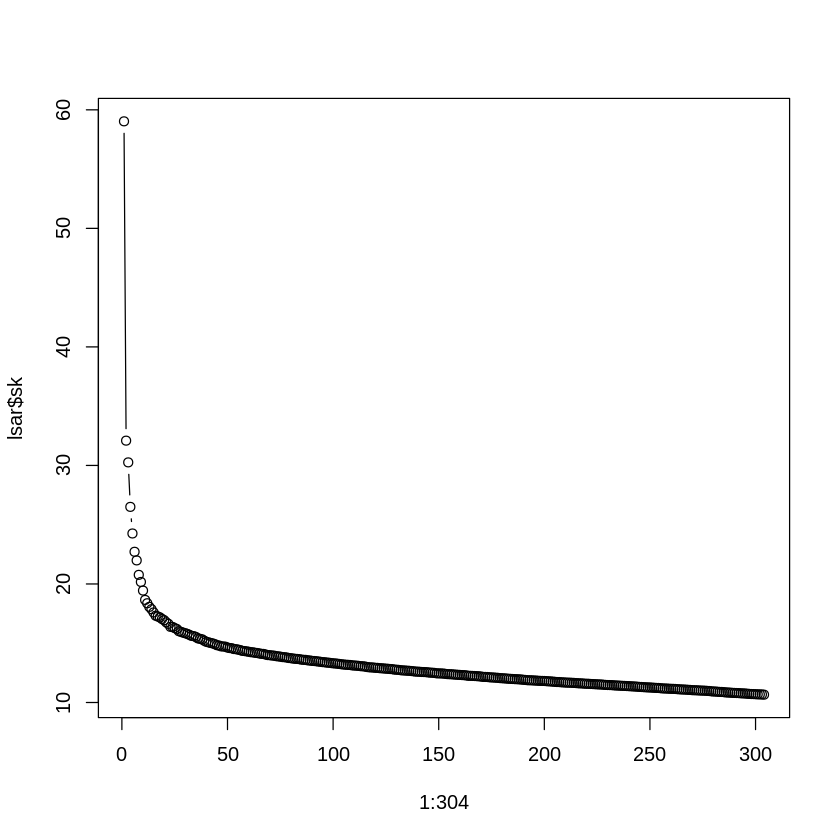

In [21]:
plot(1:304, lsar$sk, type="b")

In [22]:
tls <- lsar$tk %*% diag(lsar$sk)
dls <- lsar$dk %*% diag(lsar$sk)

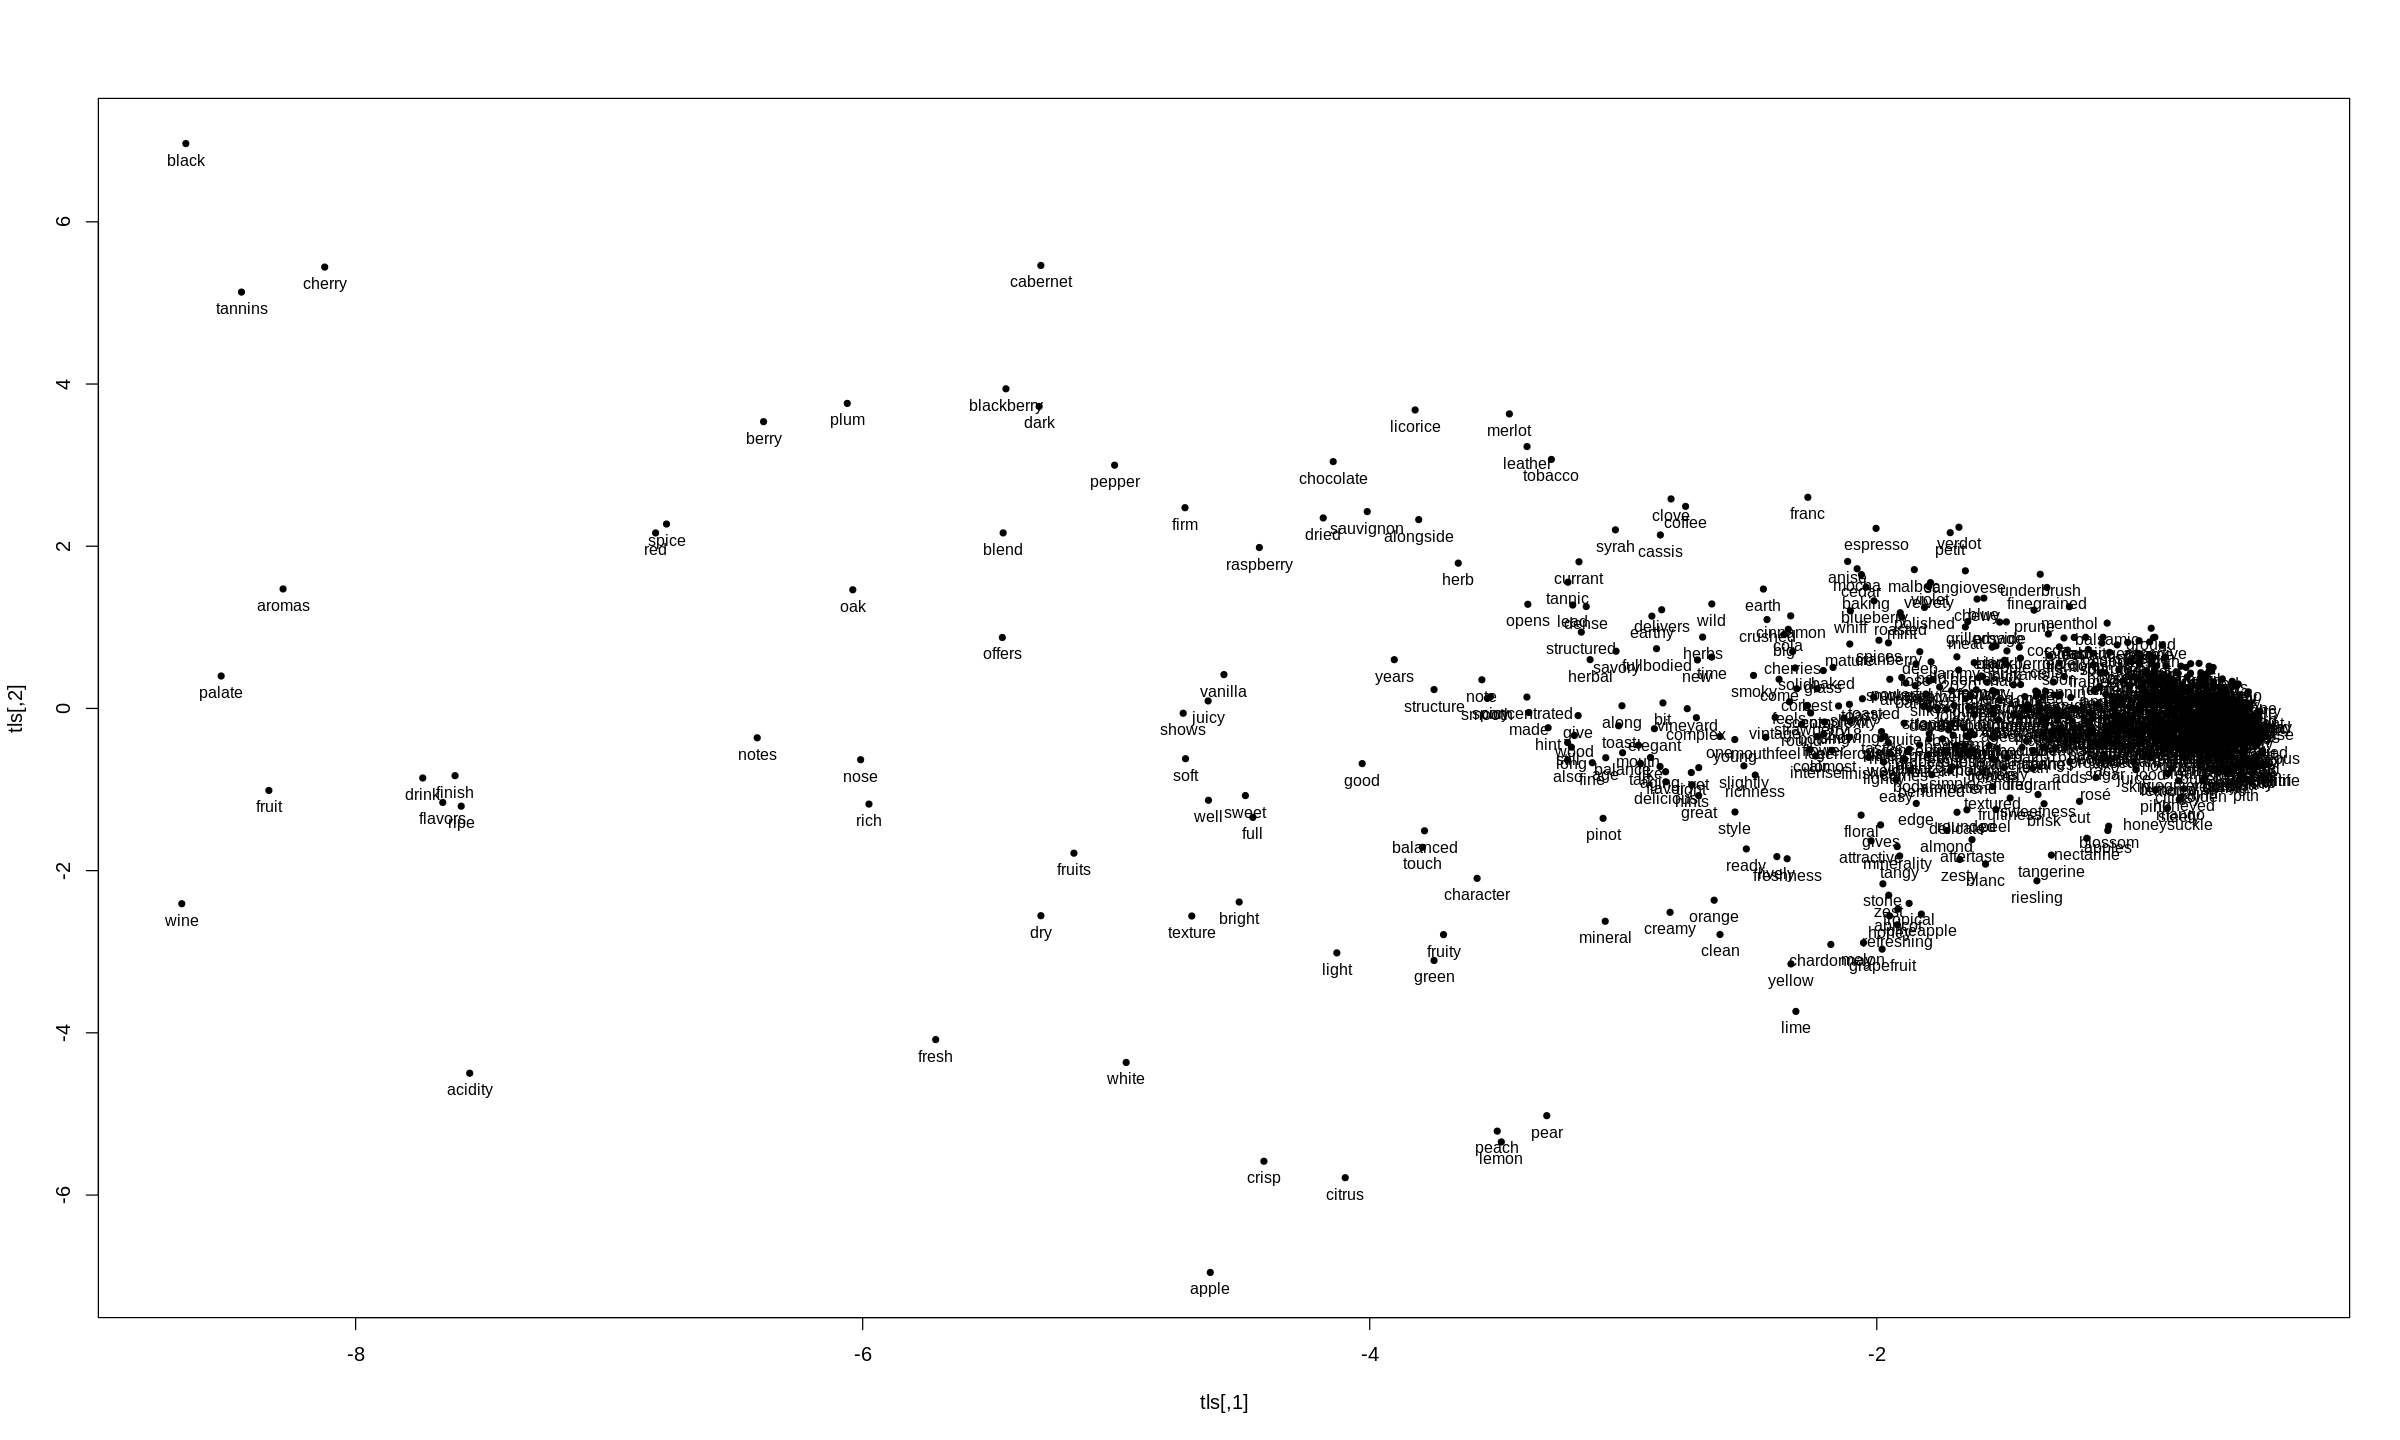

In [23]:
options(repr.plot.width=20, repr.plot.height=12)
plot(tls, pch=20)
text(tls,labels=words, cex=0.8, pos=1)
points(0,0,pch=20,cex=3,col="red")

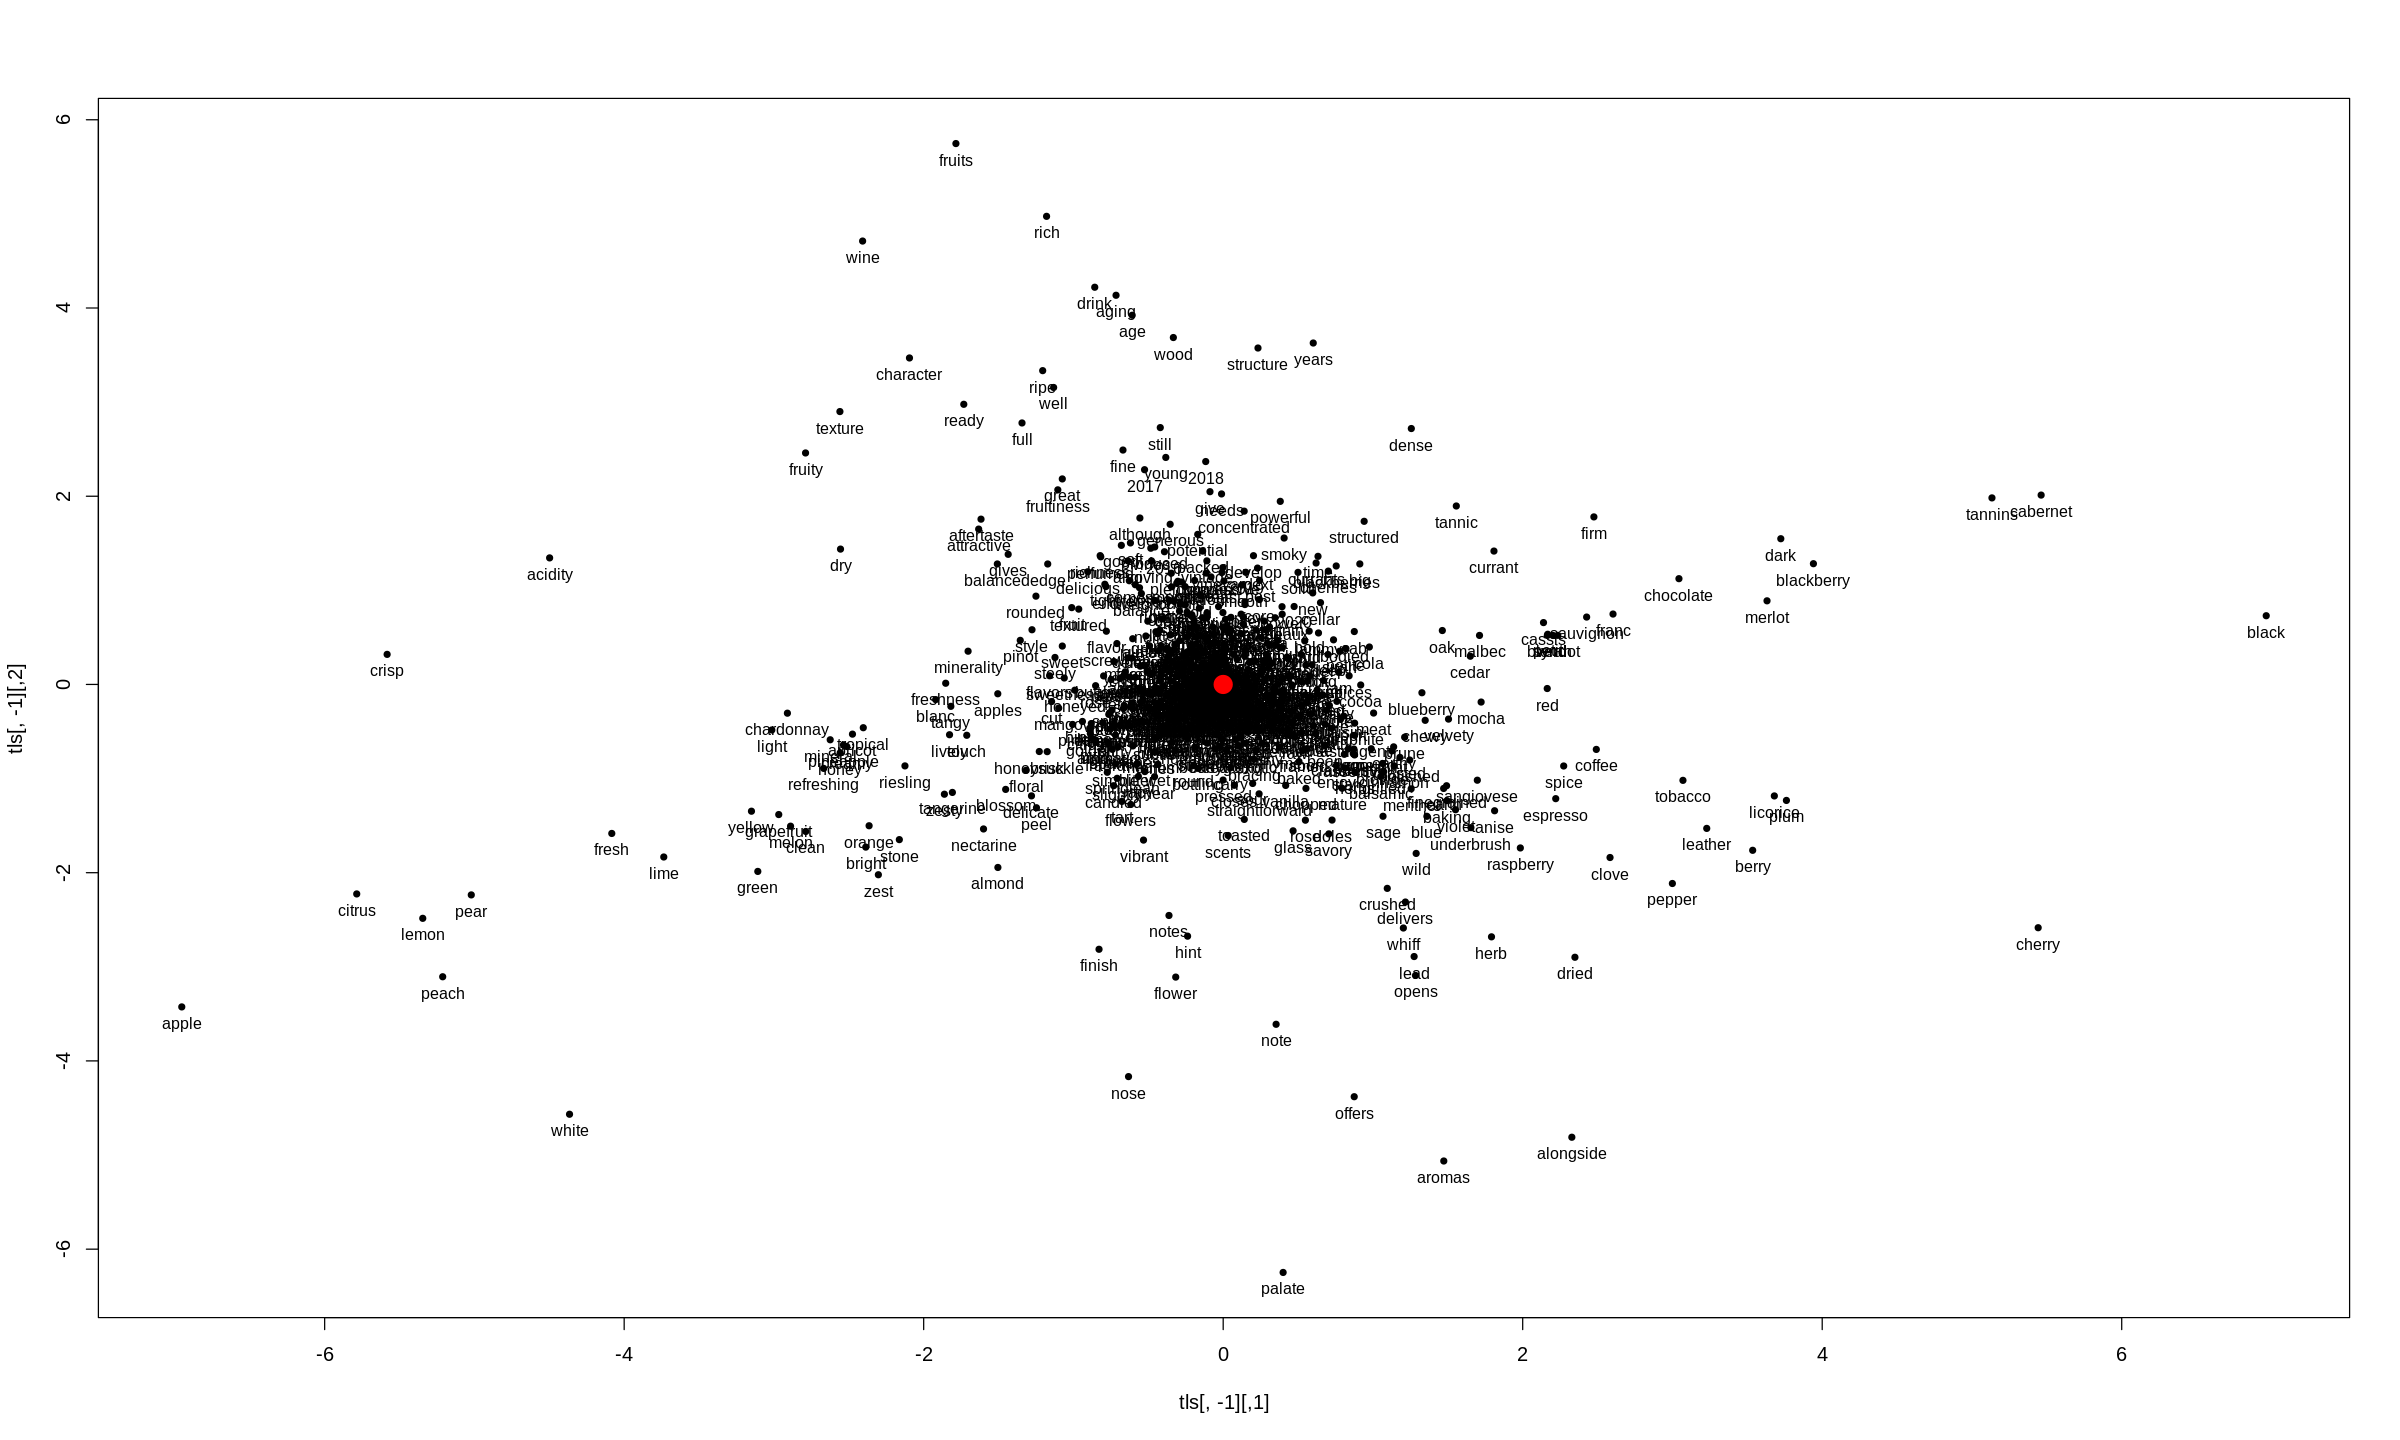

In [24]:
plot(tls[,-1], pch=20)
text(tls[,-1],labels=words, cex=0.8, pos=1)
points(0,0,pch=20,cex=3,col="red")

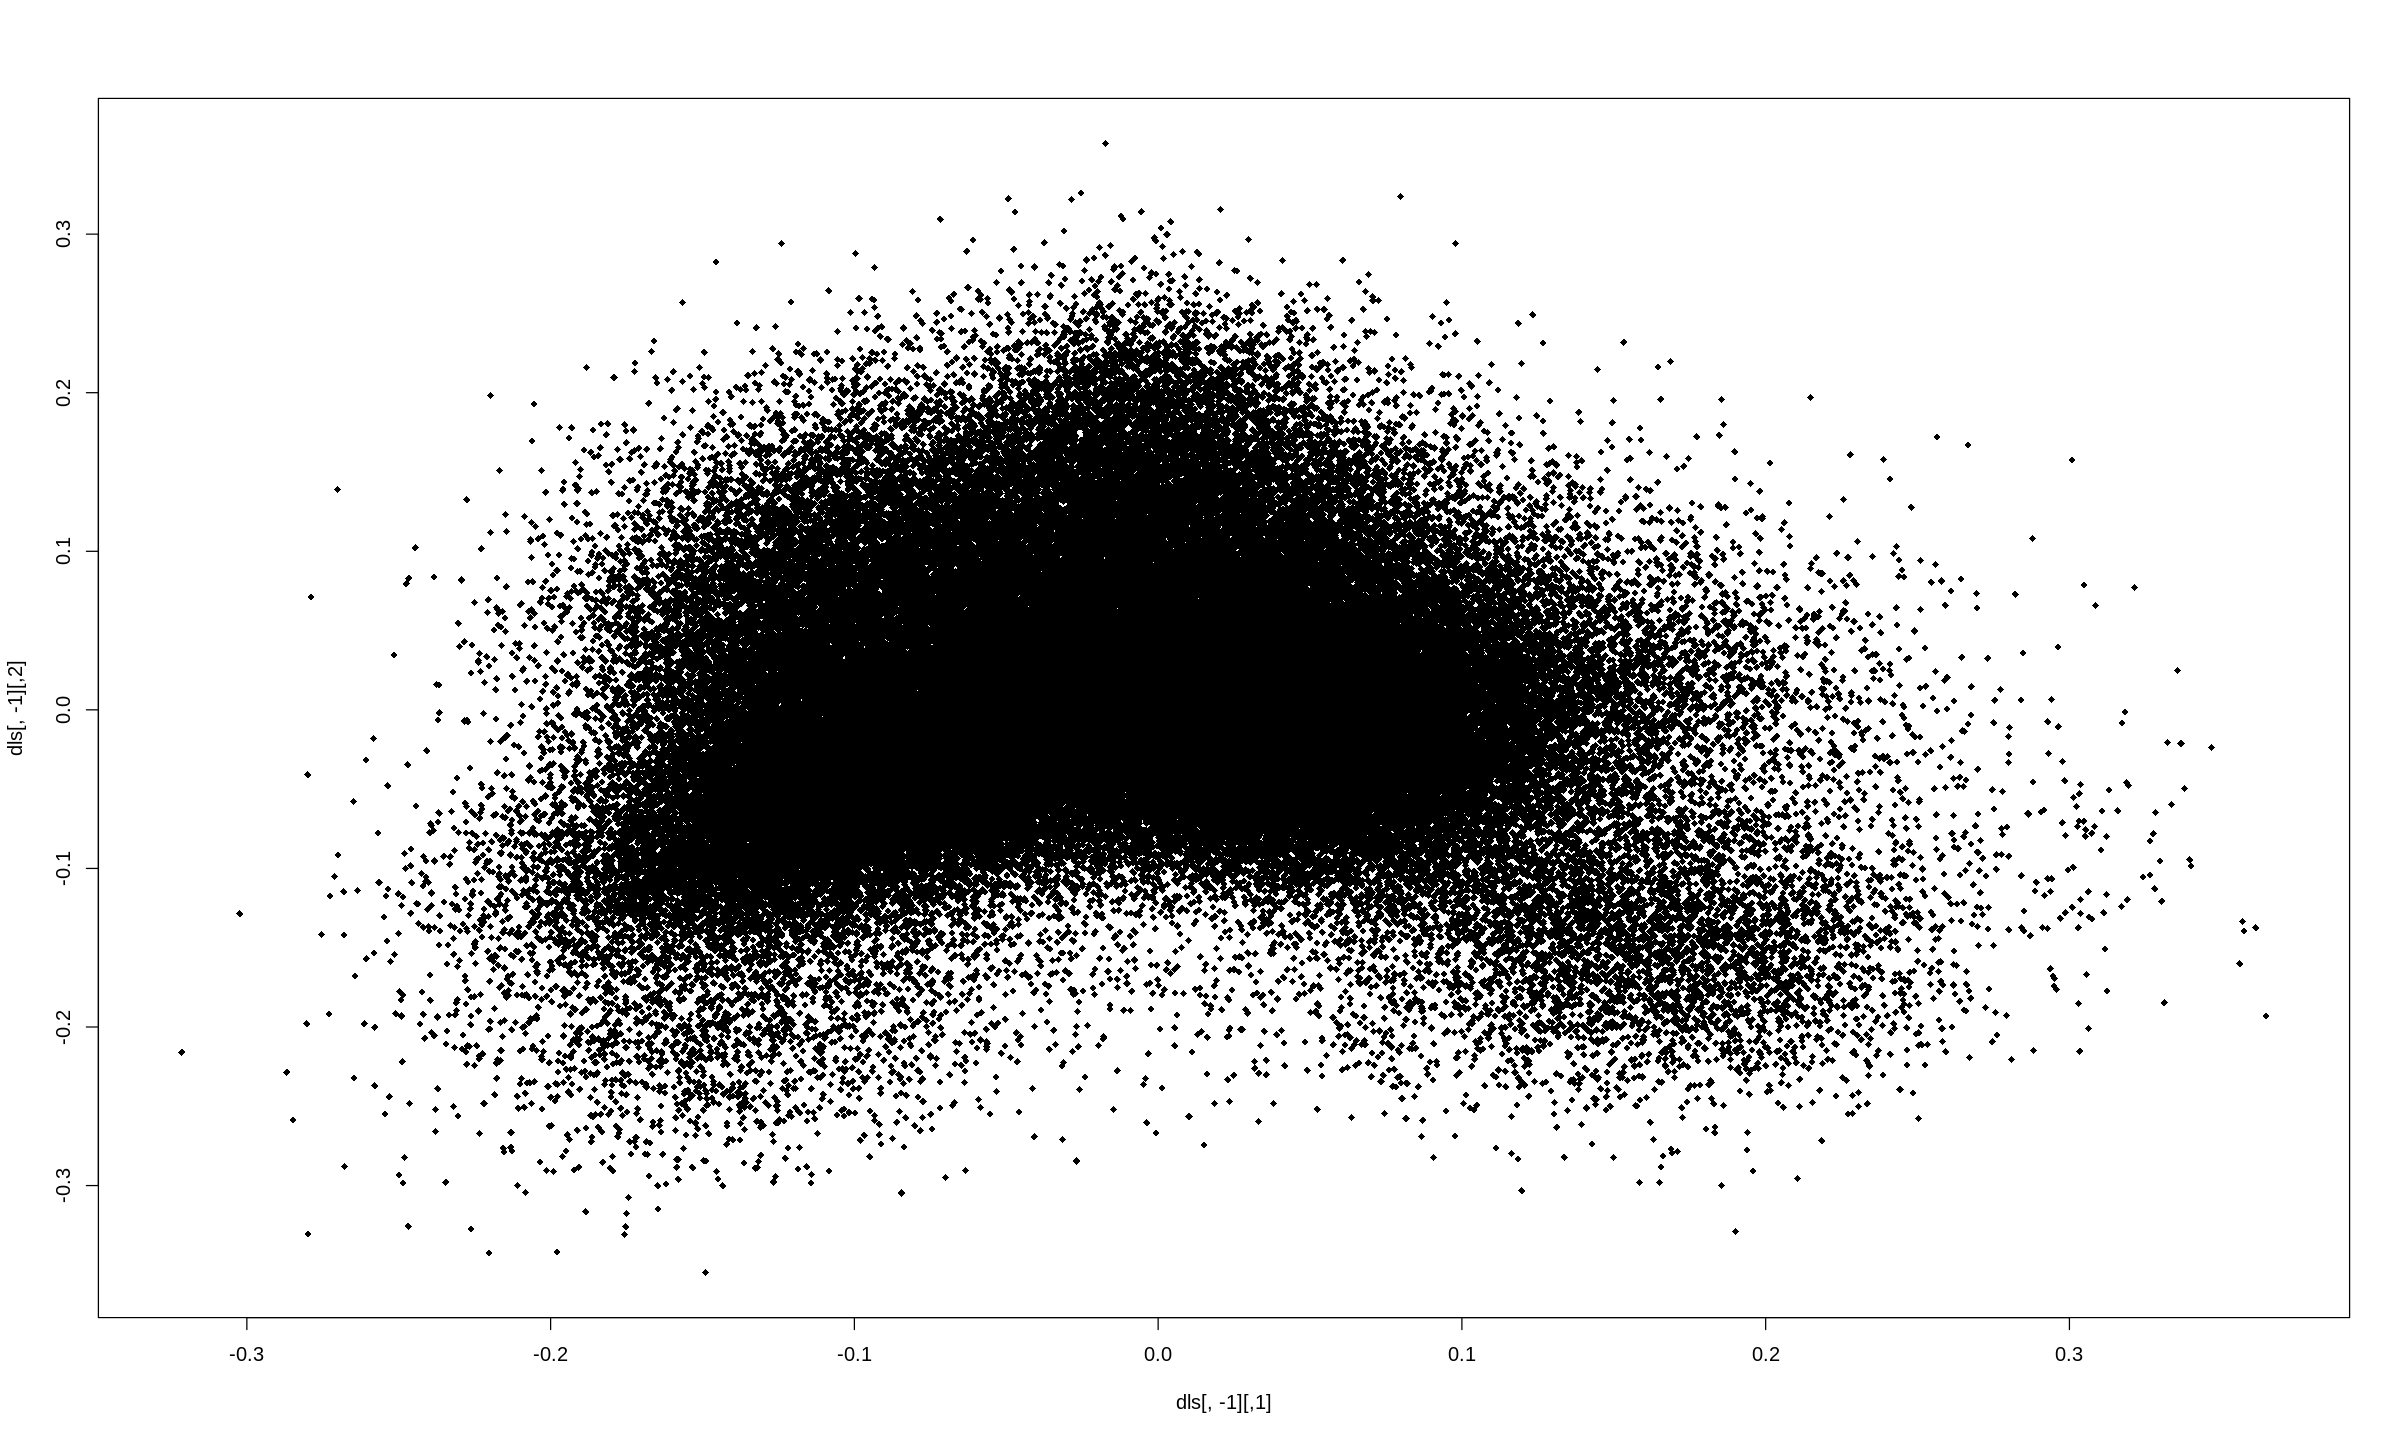

In [25]:
plot( dls[,-1], pch=18, cex=0.8 )

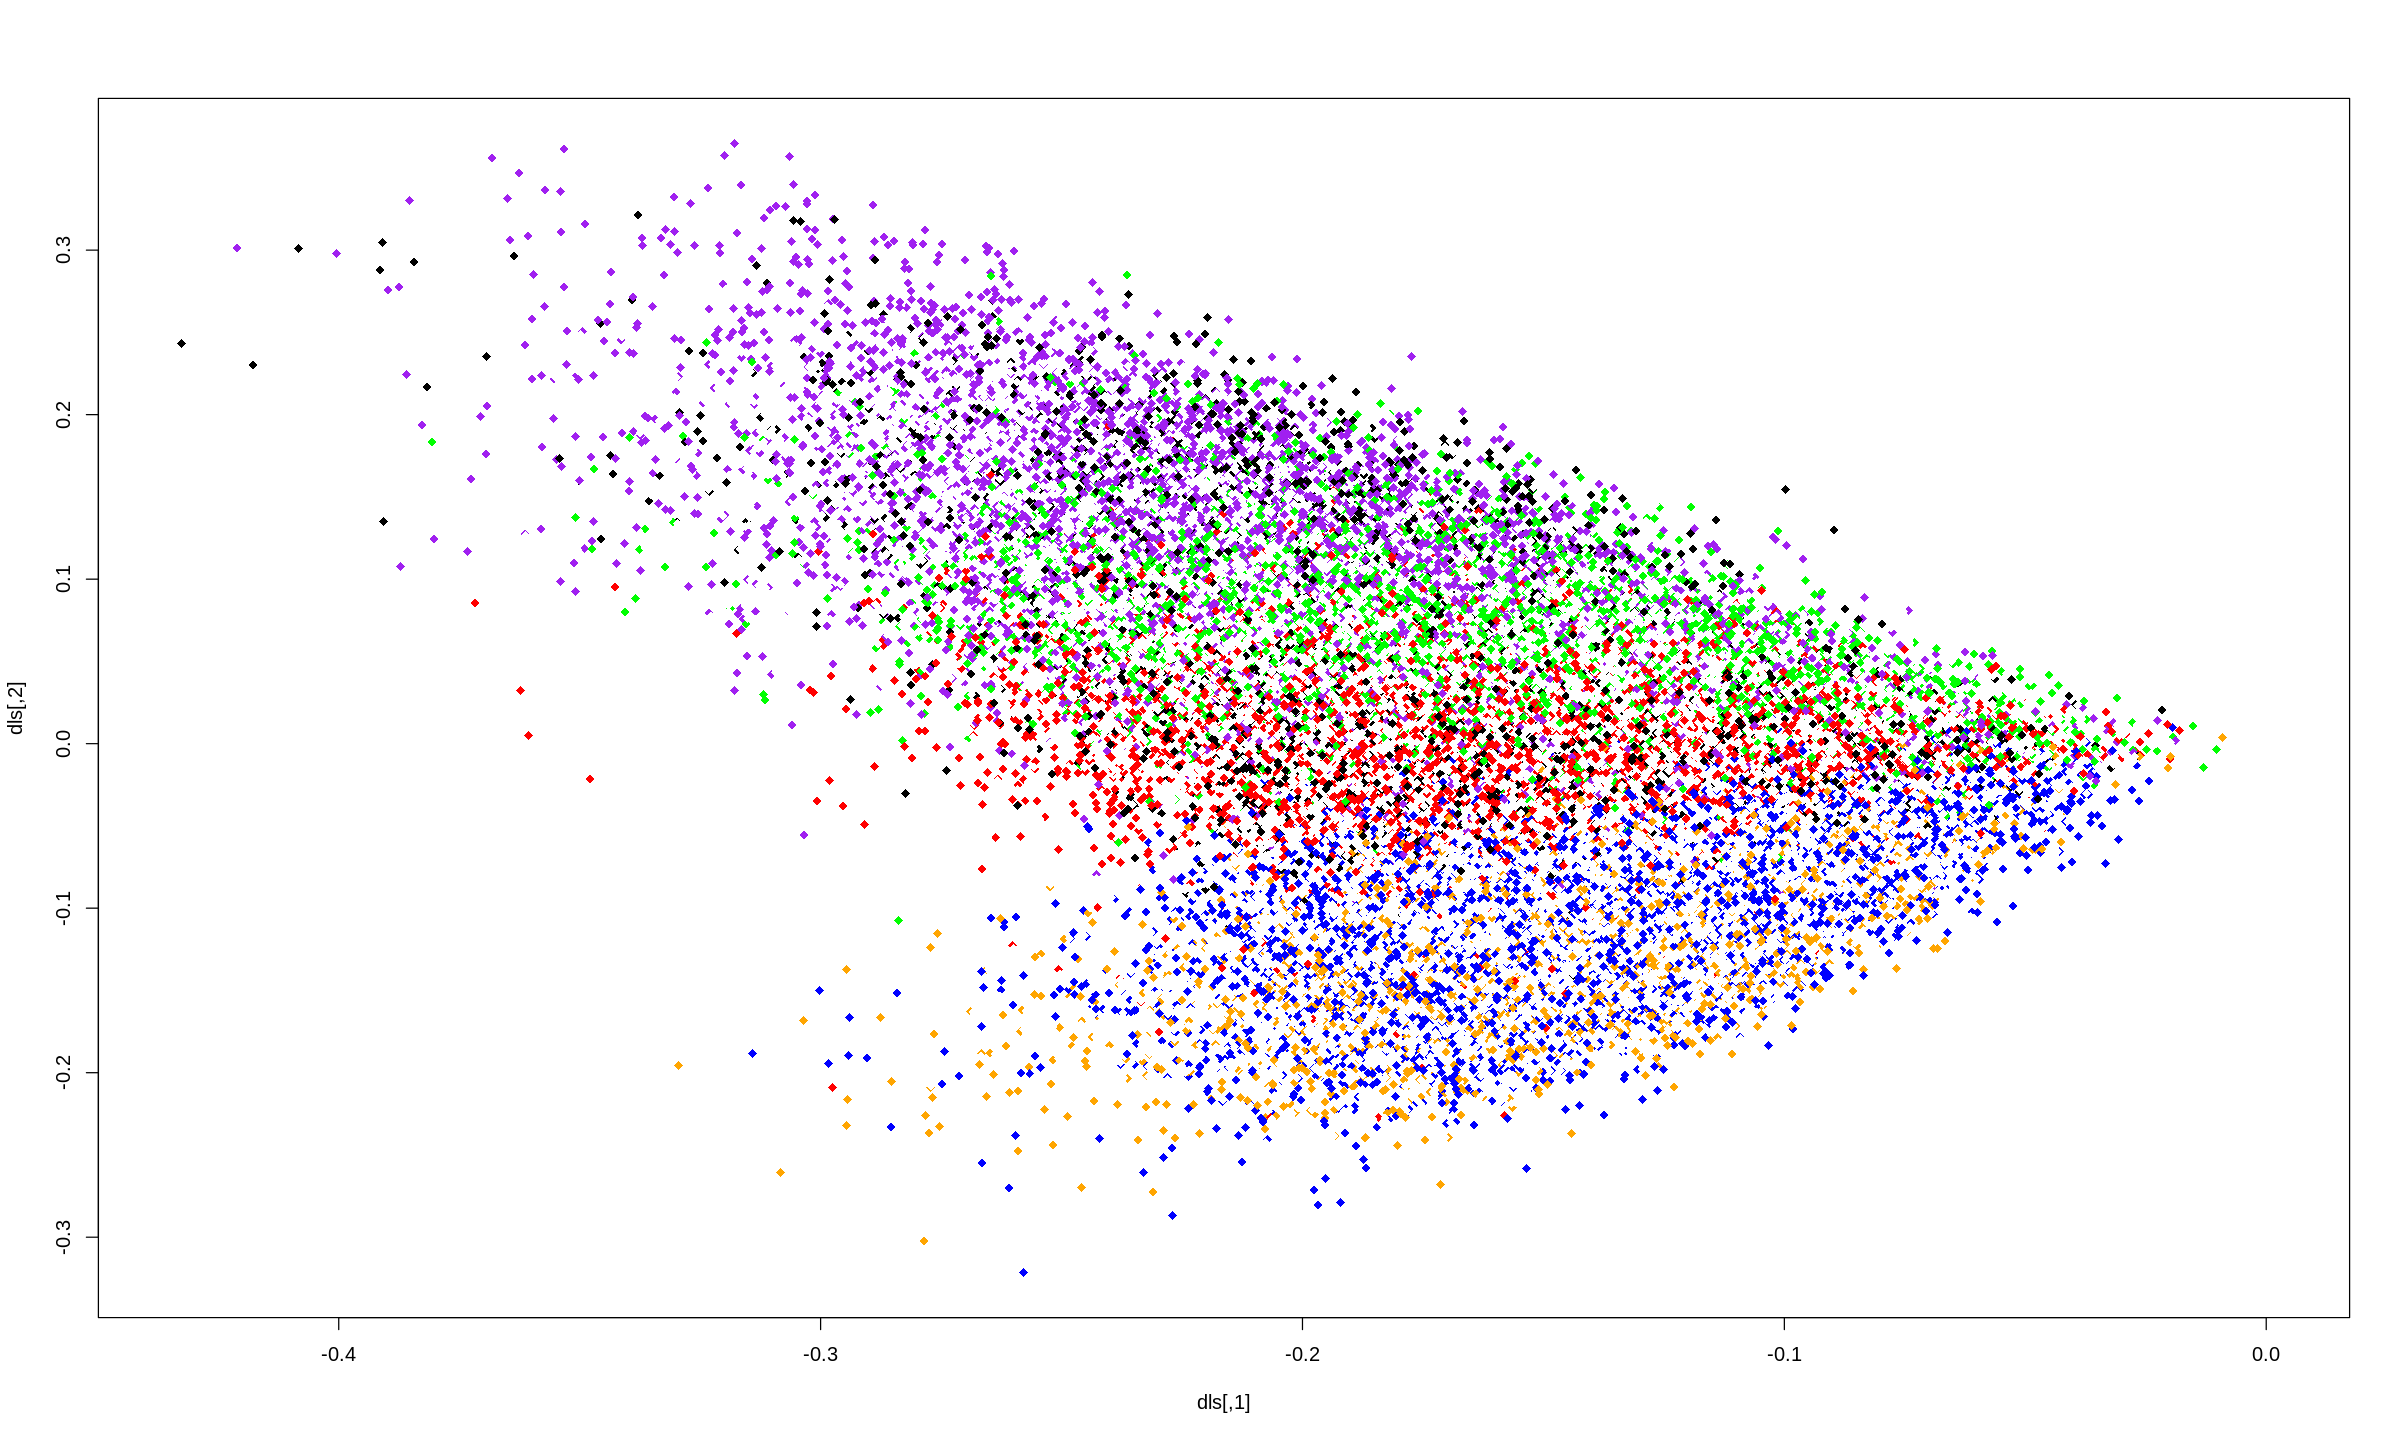

In [40]:
varietycolor <- function(x) switch(x, "Pinot Noir" = "red", "Chardonnay"="blue", "Cabernet Sauvignon"="green", "Red Blend"="purple", "Bordeaux-style Red Blend"="black","Riesling" = "orange", "white")
damcols <- sapply(variety, varietycolor)
plot( dls, pch=18, cex=1, col=damcols )

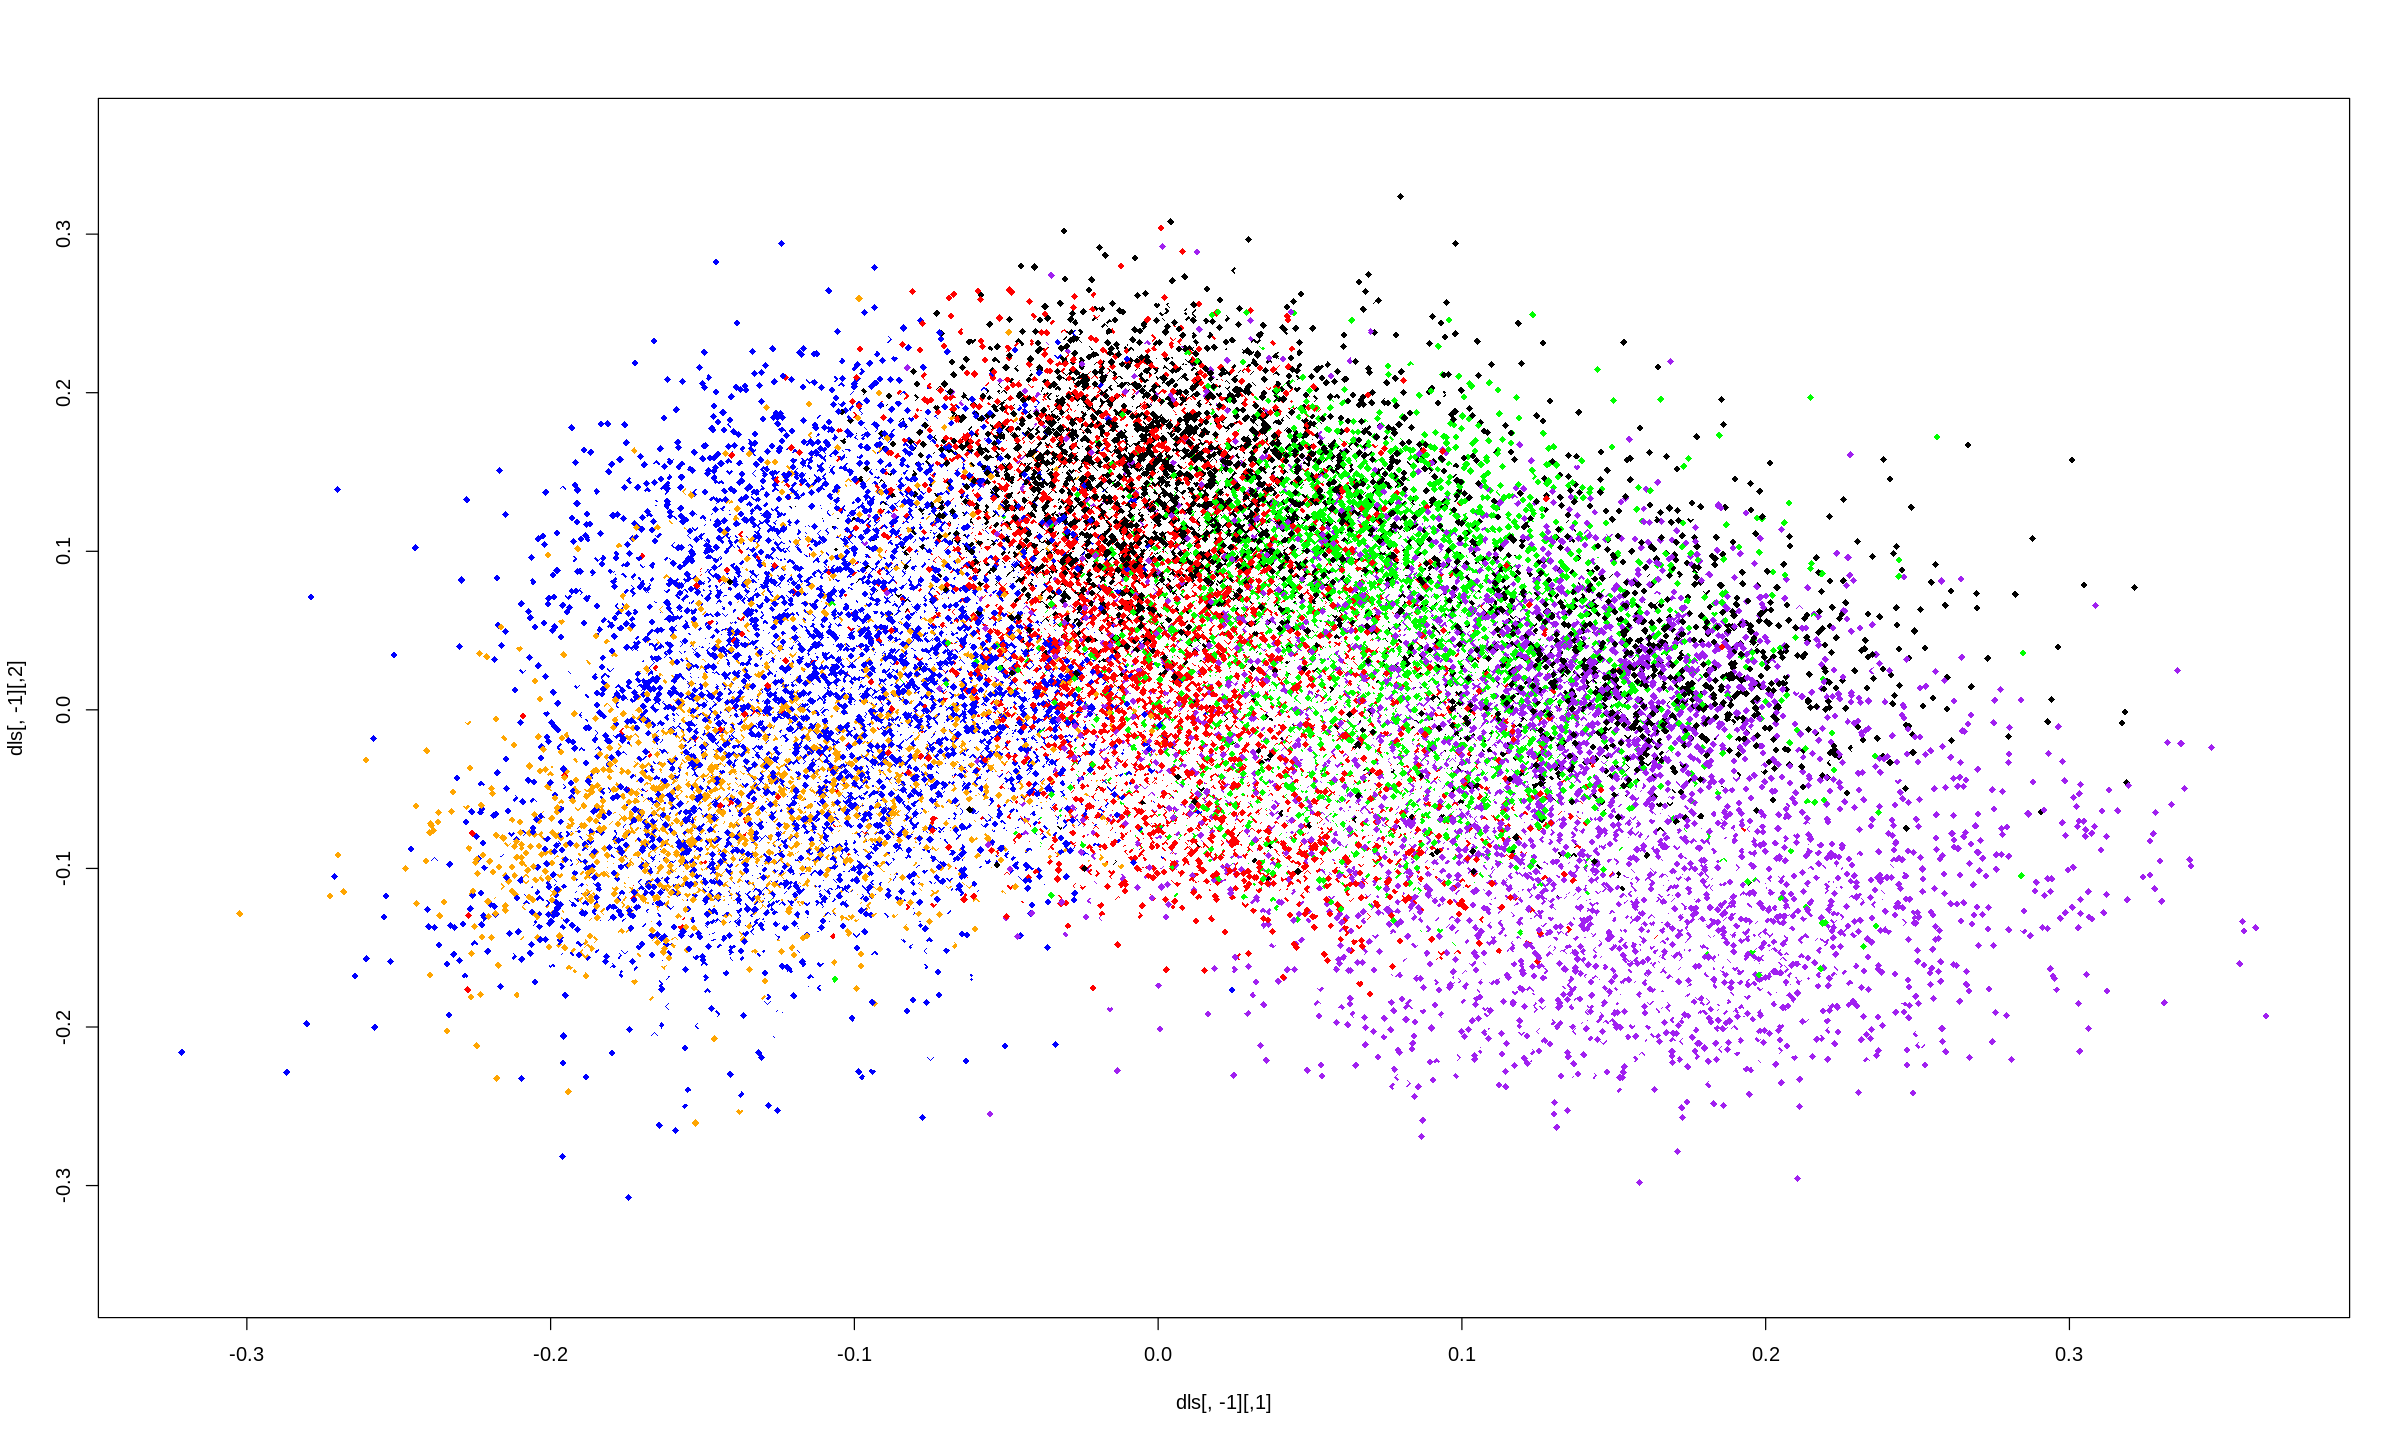

In [41]:
plot( dls[,-1], pch=18, cex=0.8, col=damcols )

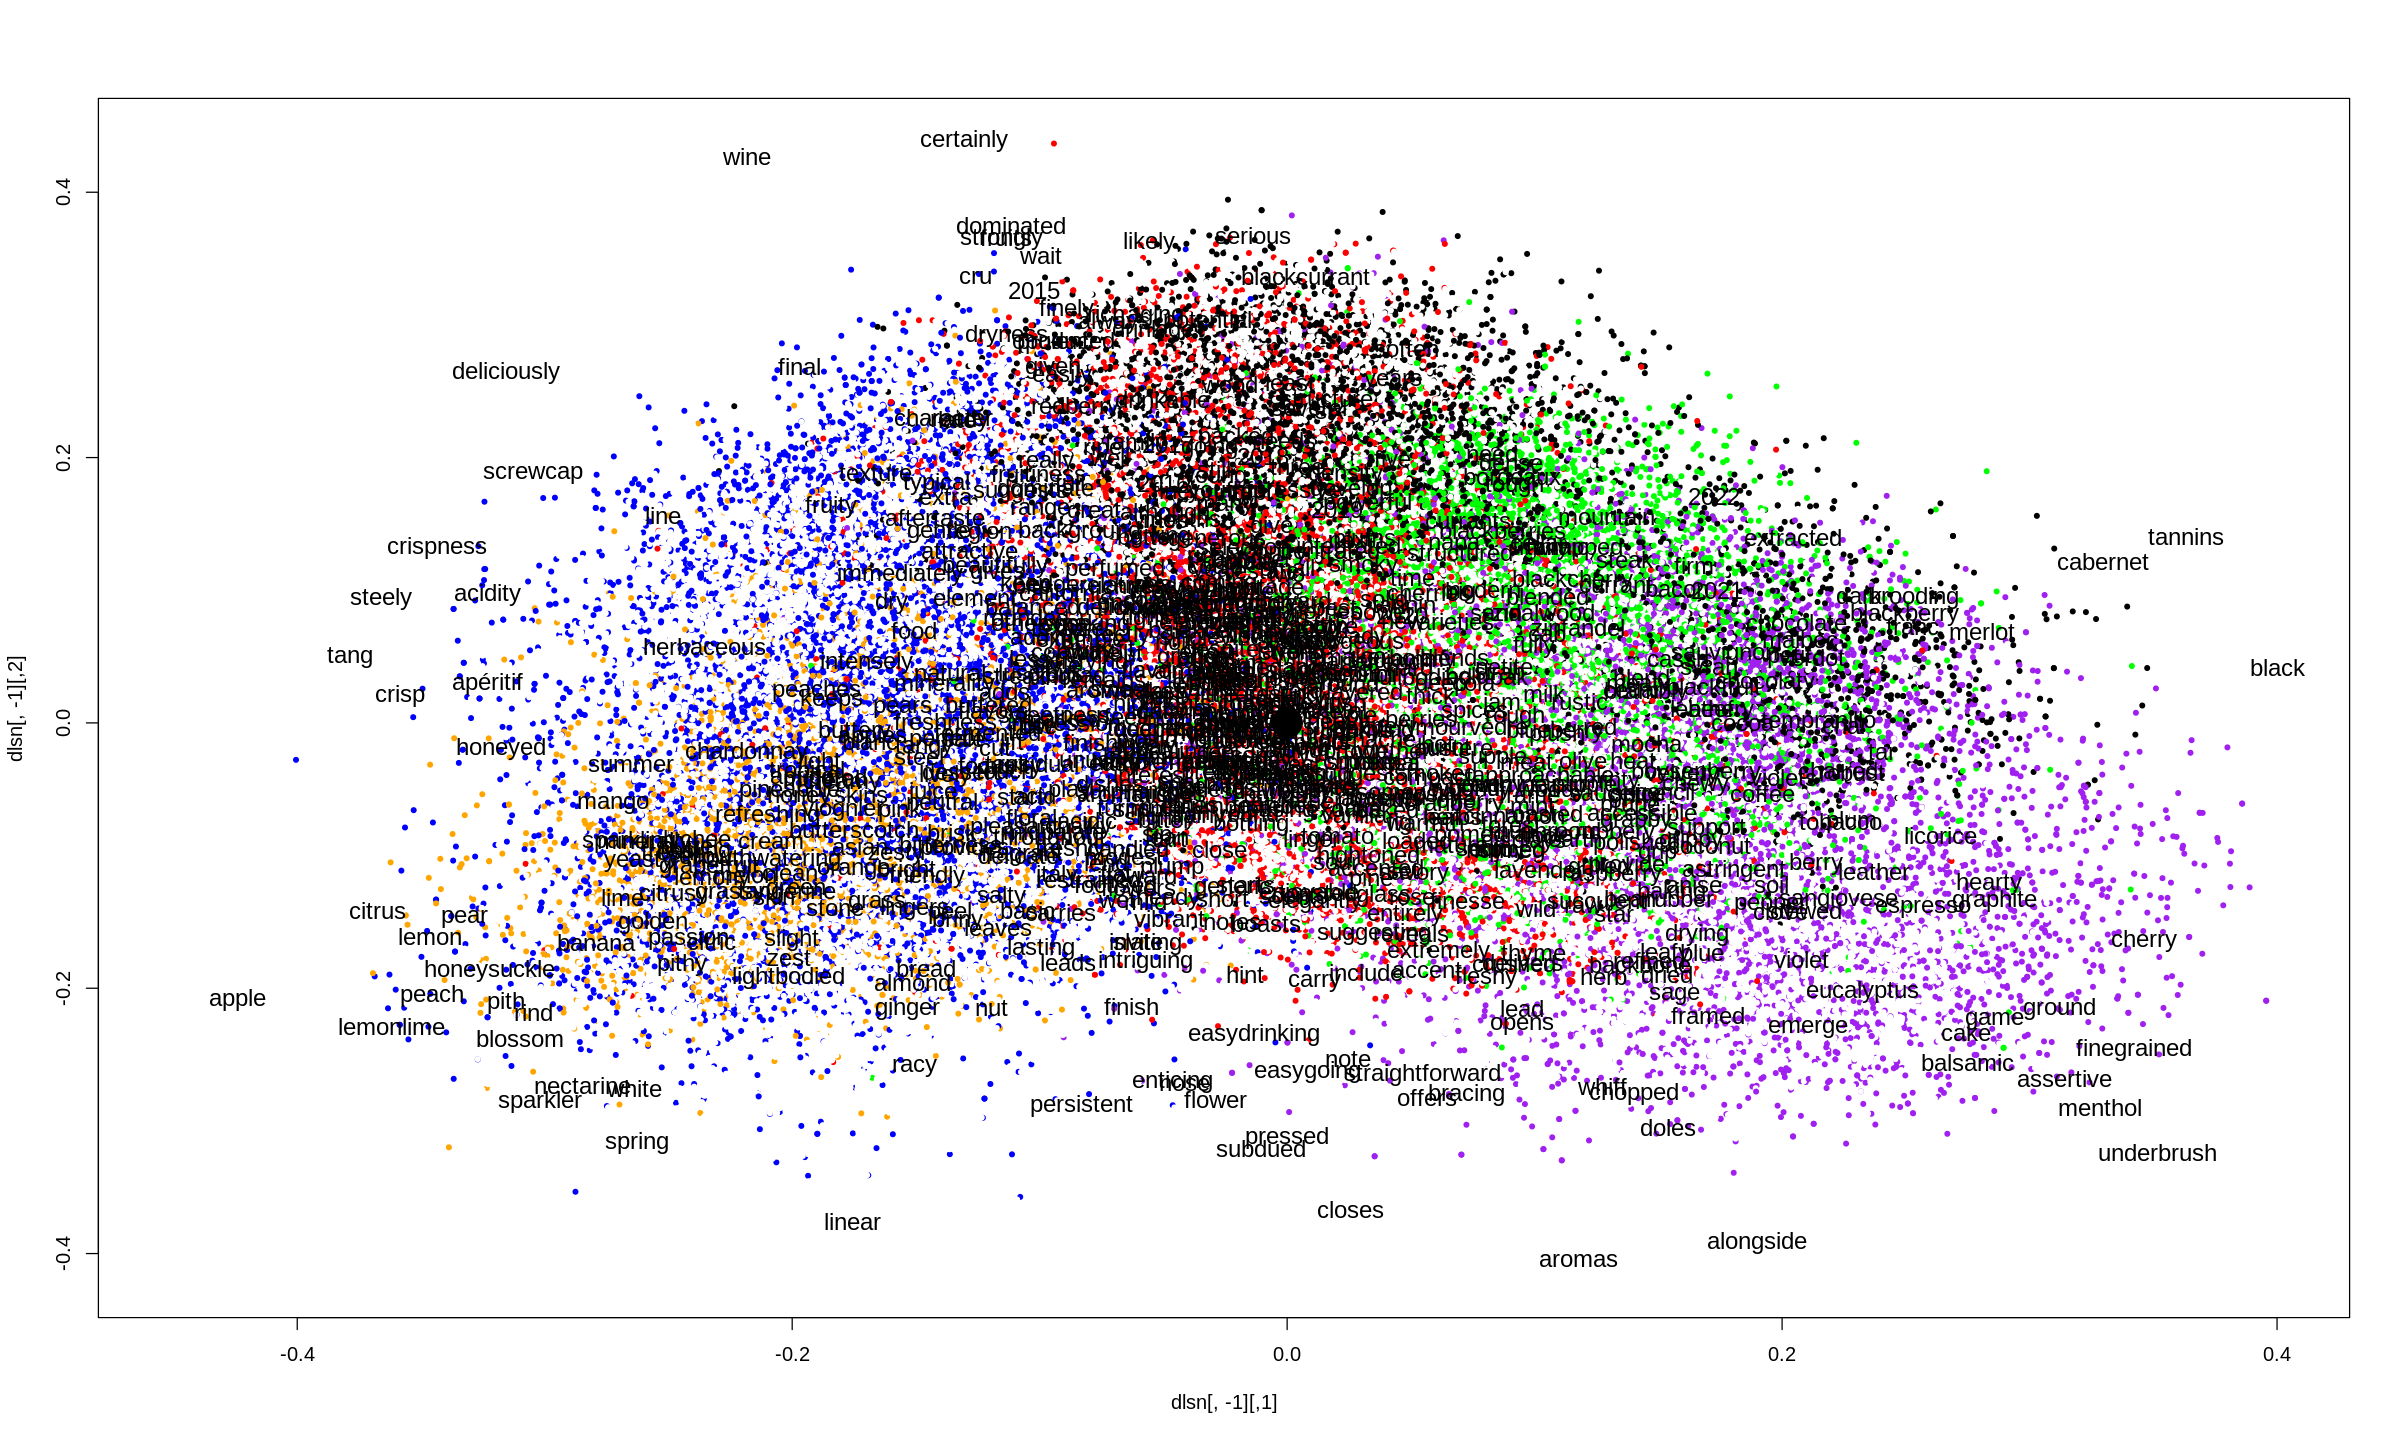

In [42]:
normrows <- function(x) x / apply(x,1,norm,"2")
tlsn <- normrows(tls)
dlsn <- normrows(dls)
plot( dlsn[,-1], pch=20, cex=0.8, col=damcols )
text( tlsn[,-1], labels=words, cex=1.2 )
points( 0, 0, pch=20, cex=5 )

In [44]:
menthol.vs.redBlend <- table( tdm["menthol",]>0, variety=="Red Blend")
dimnames(menthol.vs.redBlend) <- list(menthol = c("No", "Si"), redBlend = c("No", "Si"))
chisqtest = chisq.test( menthol.vs.redBlend, correct=FALSE )
chisqtest


	Pearson's Chi-squared test

data:  menthol.vs.redBlend
X-squared = 175.63, df = 1, p-value < 2.2e-16


In [45]:
chisqtest$expected
chisqtest$observed

redBlend
menthol No        Si        
     No 119917.84 8864.16025
     Si   1107.16   81.83975

       redBlend
menthol     No     Si
     No 120033   8749
     Si    992    197

In [68]:
norm_vec <- function(x) sqrt(sum(x^2))
norma_termini_lsa <- apply(tls, 1, norm_vec)

In [70]:
neighborMenth = names (associate(tls[,2:3], "menthol", threshold=0.999))

In [71]:
norma_termini_lsa[neighborMenth]

raspberry eucalyptus    grilled     violet  assertive       cake  cranberry 
 15.137773   1.990737   8.505795   7.469976   2.794663   2.257367  11.976729 
underbrush     forest   balsamic     rubber   displays      offer     baking 
  4.703925   9.595741   3.823730   1.689052   1.340683   1.615048   9.631383 
     floor       bean     drying 
  8.105699   4.903036   3.170057

In [81]:
grilled.vs.redBlend <- table( tdm["grilled",]>0, variety=="Red Blend")
dimnames(grilled.vs.redBlend) <- list(grilled = c("No", "Si"), redBlend = c("No", "Si"))
chisqtest = chisq.test( grilled.vs.redBlend, correct=FALSE )
chisqtest


	Pearson's Chi-squared test

data:  grilled.vs.redBlend
X-squared = 339.85, df = 1, p-value < 2.2e-16


In [82]:
chisqtest$expected
chisqtest$observed

redBlend
grilled No        Si       
     No 119137.52 8806.4801
     Si   1887.48  139.5199

       redBlend
grilled     No     Si
     No 119346   8598
     Si   1679    348

In [87]:
grilledMen.vs.redBlend <- table( tdm["grilled",]>0 & tdm["menthol",]>0, variety=="Red Blend")
dimnames(grilledMen.vs.redBlend) <- list(grilledMen = c("No", "Si"), redBlend = c("No", "Si"))
chisqtest = chisq.test( grilledMen.vs.redBlend, correct=FALSE )
chisqtest


	Pearson's Chi-squared test

data:  grilledMen.vs.redBlend
X-squared = 51.043, df = 1, p-value = 9.037e-13


In [88]:
chisqtest$expected
chisqtest$observed

redBlend
grilledMen No           Si         
        No 120937.47009 8939.529911
        Si     87.52991    6.470089

          redBlend
grilledMen     No     Si
        No 120955   8922
        Si     70     24

In [89]:
grilledMenth.Query <- "grilled menthol"
grilledMenth.Vector <- query( grilledMenth.Query, words )
grilledMenth.VWeight <- lw_logtf(grilledMenth.Vector) * ( 1-entropy(tdm) )
grilledMenth.LSA <- t(grilledMenth.VWeight) %*% lsar$tk
grilledMenth.LSA

[,1]        [,2]       [,3]        [,4]       [,5]        
GRILLED MENTHOL -0.01262838 0.01900402 -0.01764739 -0.0220218 0.0005851804
                [,6]       [,7]         [,8]        [,9]         [,10]      
GRILLED MENTHOL 0.00909222 -0.003335949 0.004367061 -0.006894082 0.002668269
                [,11] [,12]      [,13]      [,14]     [,15]      [,16]      
GRILLED MENTHOL ⋯     0.02561315 0.01333642 0.0203187 0.02316476 0.002072085
                [,17]      [,18]      [,19]      [,20]      [,21]      
GRILLED MENTHOL 0.01523057 0.01116824 0.01740663 0.01641608 -0.03220985

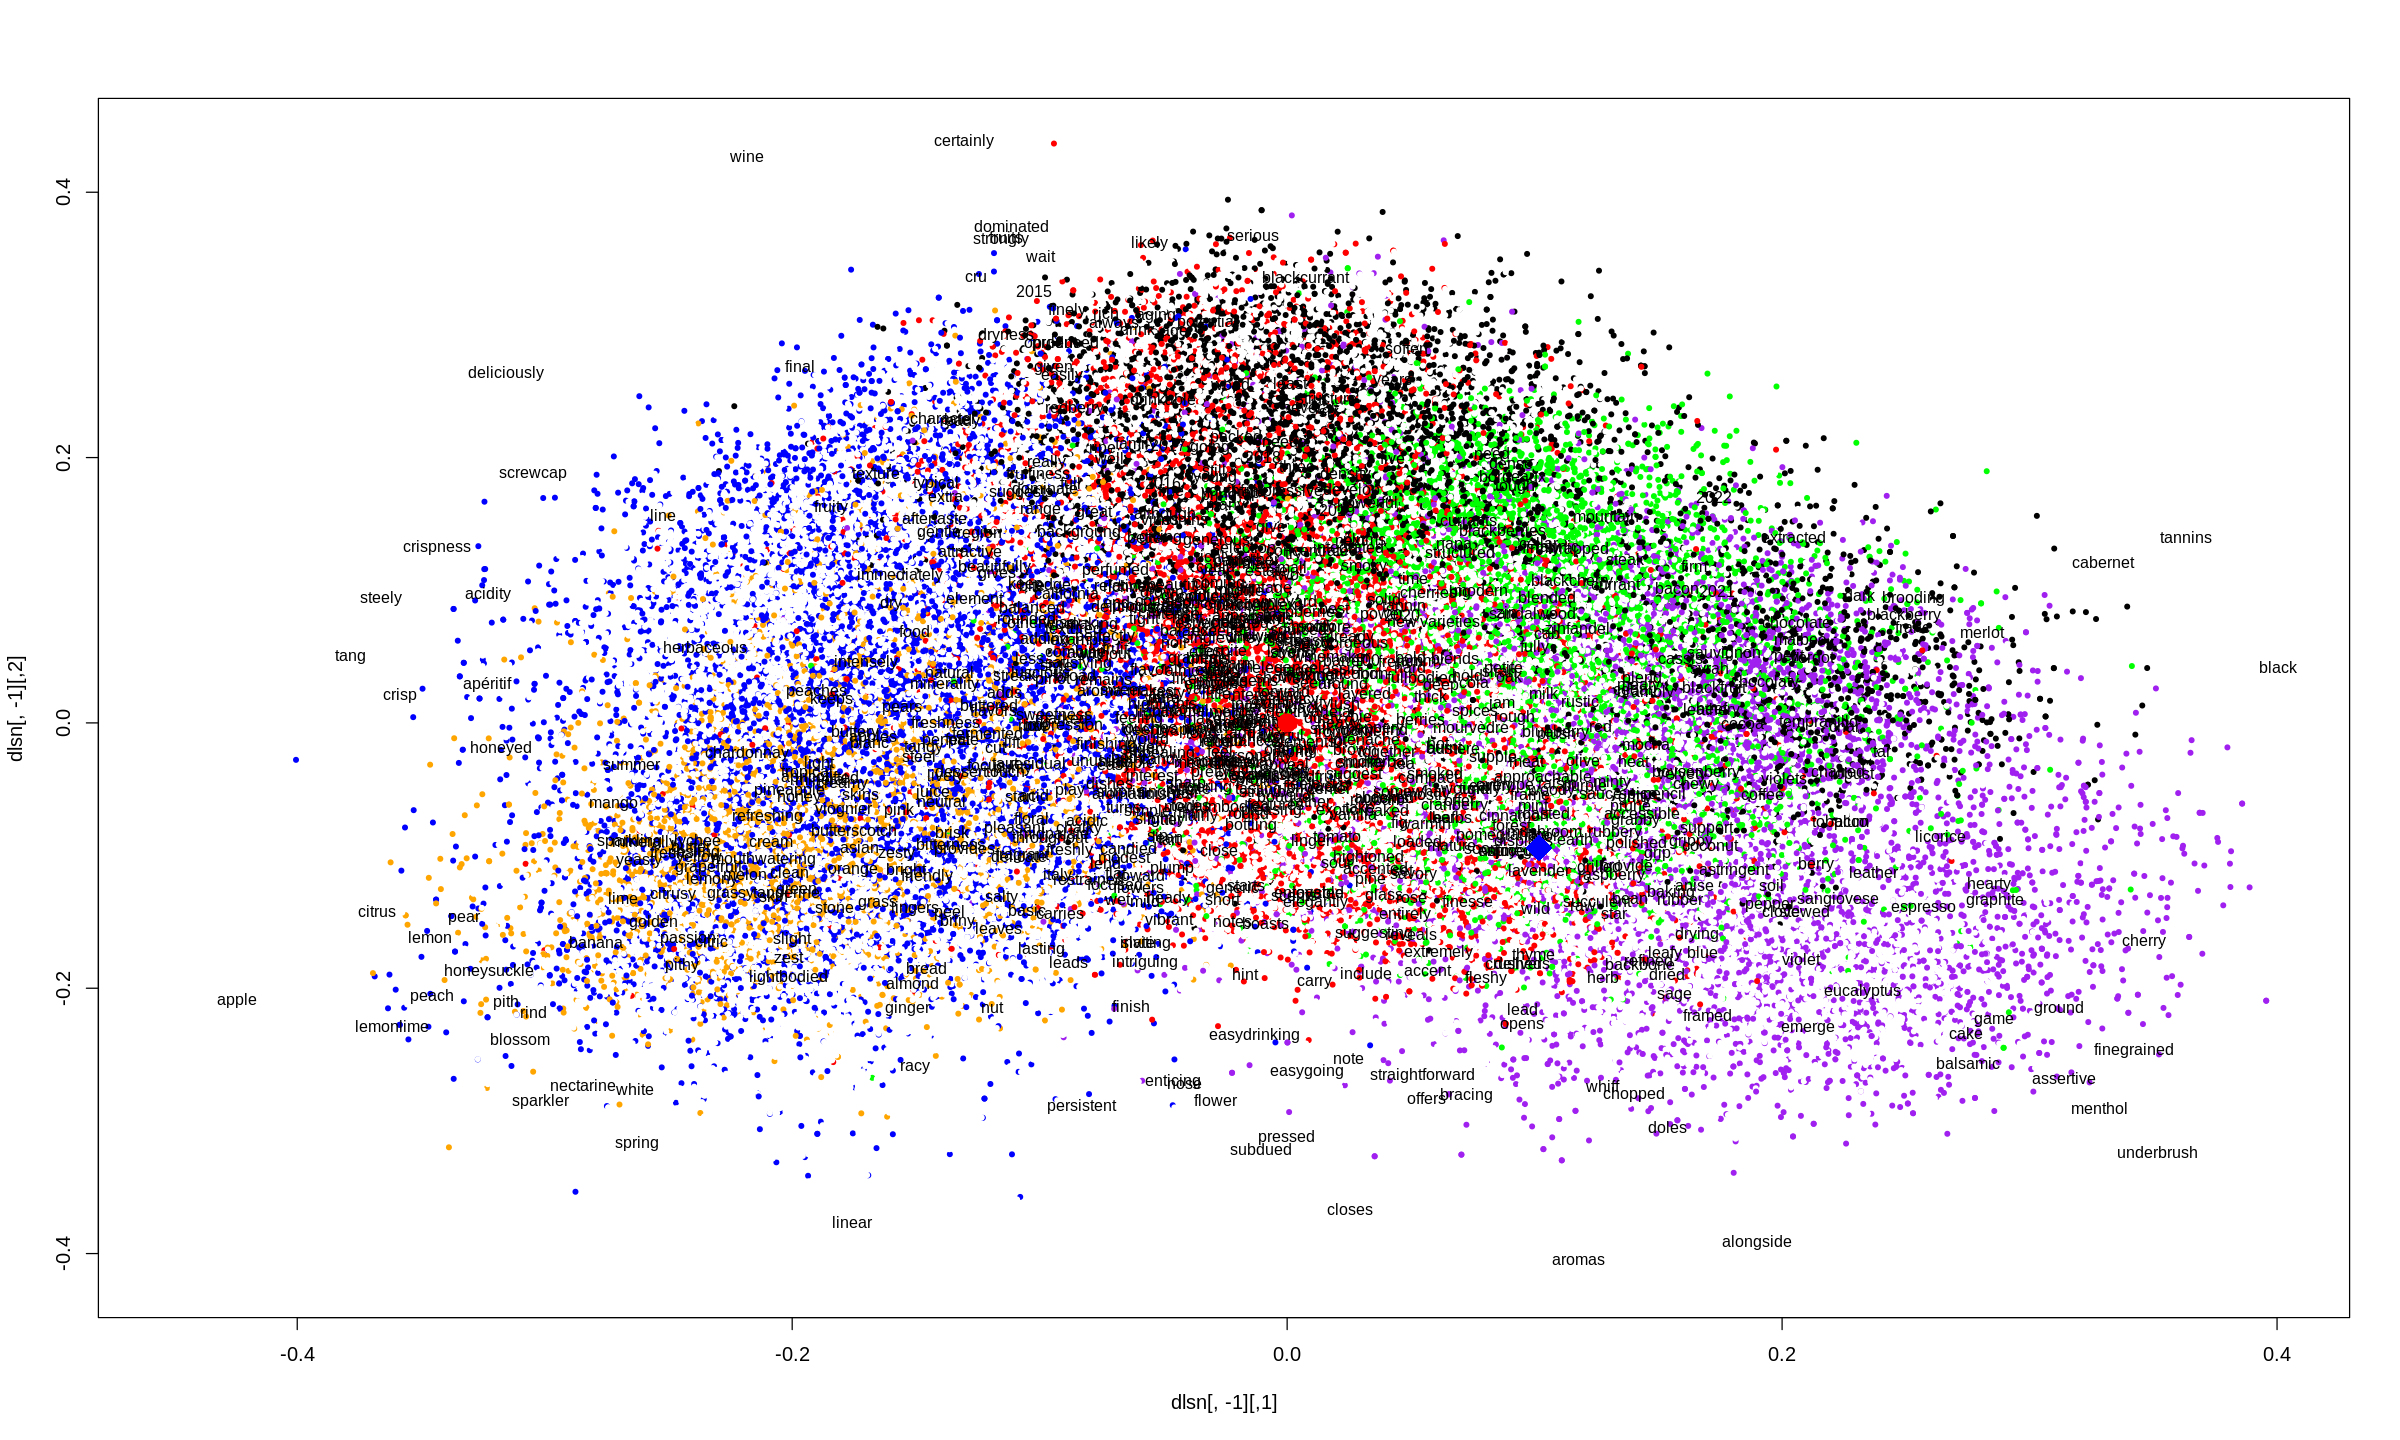

In [95]:
plot( dlsn[,-1], pch=20, cex=0.8, col=damcols )
text( tlsn[,-1], labels=words, cex=0.8 )
points( 0, 0, pch=20, cex=3,col="red" ) 
grilledMenth.LSANorm <- normrows( grilledMenth.LSA )
points(grilledMenth.LSANorm[2], grilledMenth.LSANorm[3],cex=3,pch=18,col="blue")

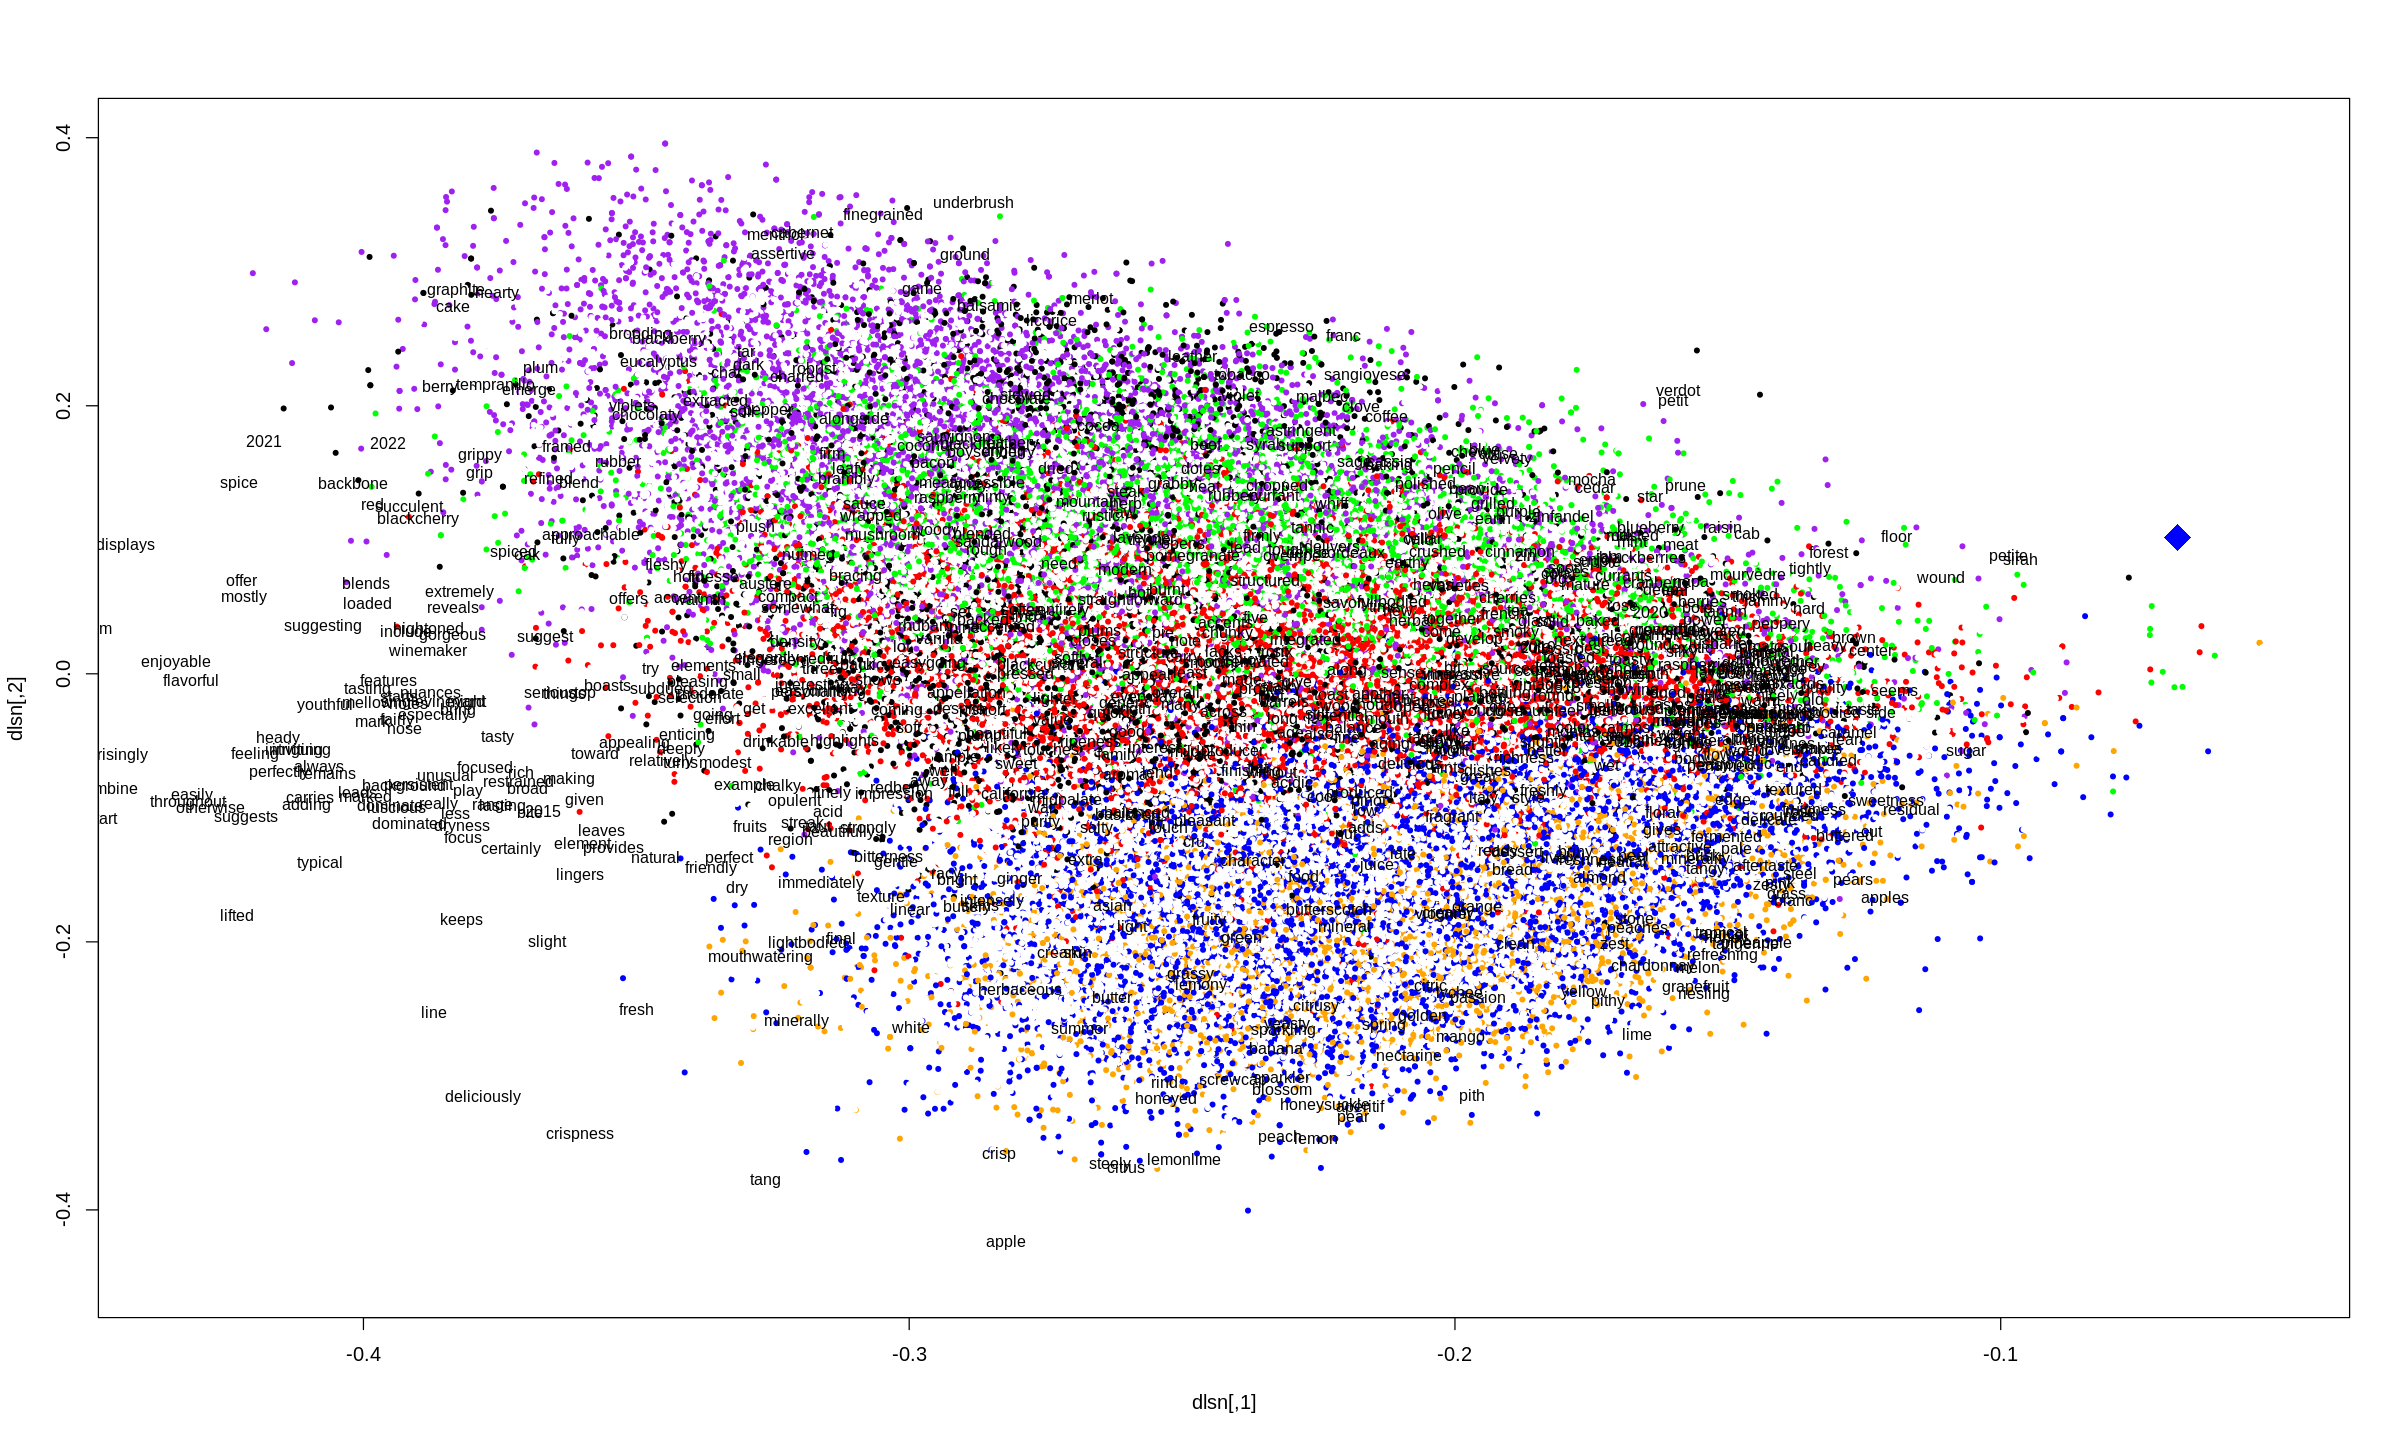

In [96]:
plot( dlsn, pch=20, cex=0.8, col=damcols )
text( tlsn, labels=words, cex=0.8 )
points( 0, 0, pch=20, cex=3 )
points(grilledMenth.LSANorm,cex=3,pch=18,col="blue")

In [98]:
cosines <- function(X, Q) apply( X, 1, cosine, as.vector(Q) )
top <- function(X, N) order( X, decreasing=TRUE )[1:N]

In [101]:
top( cosines( dls[,2:3], grilledMenth.LSA[2:3] ), 10 )
# elenco dei 10 documenti sopra menzionati 
variety[top( cosines( dls[,2:3], grilledMenth.LSA[2:3] ), 10 )]
reviews[top(cosines(dls[,2:3], grilledMenth.LSA[2:3]), 10)]

[1]  89488   8515  82686  88284   3746  53151 119357   1086 118192  47697

[1] "Negroamaro"            "Red Blend"             "Sangiovese Grosso"    
 [4] "Sangiovese Grosso"     "Merlot"                "Rhône-style Red Blend"
 [7] "Rhône-style Red Blend" "Zinfandel"             "Pinot Noir"           
[10] "Nebbiolo"

[1] "Aromas of oak, vanilla, espresso and mature black plum carry over to the palate along with notes of prune, grilled herb and clove. The palate is framed by astringent, woody tannins that generate a fleeting, drying finish."                                                                                                                                                         
 [2] "Here's an easy Sangiovese-based wine (with a small percent of Petit Verdot for extra darkness and color) that would pair wonderfully with stay-home pizza or pasta. The wine offers bright berry nuances of cherry and raspberry and a touch of distant spice and smoke on the fade."                                                                                                  
 [3] "This Brunello opens with a bright ruby color and delivers aromas of cherry cola, Spanish cedar, cigar box, wild berries and spice. It's a streamlined wine that puts more emphasis on elegance than brawn or power. A Marc de Grazia selection; various American importers."                                                                                                           
 [4] "This Brunello opens with a bright ruby color and delivers aromas of cherry cola, Spanish cedar, cigar box, wild berries and spice. It's a streamlined wine that puts more emphasis on elegance than brawn or power. A Marc de Grazia selection; various American importers."                                                                                                           
 [5] "The aromas are shy on this bottling, but with patience show gravel and blackberry juice. The mouthfeel is also a bit light, offering dark red and purple fruit alongside asphalt and espresso bean."                                                                                                                                                                                   
 [6] "The blend is 60% Grenache from the Stone Tree vineyard, the rest Syrah from Stillwater Creek and LVdM vineyards. It's forward, fragrant and fruity, with notes of tanned leather. Bright berry fruit shines through into a finish with moderate tannins."                                                                                                                              
 [7] "The blend is 60% Grenache from the Stone Tree vineyard, the rest Syrah from Stillwater Creek and LVdM vineyards. It's forward, fragrant and fruity, with notes of tanned leather. Bright berry fruit shines through into a finish with moderate tannins."                                                                                                                              
 [8] "From dry-farmed 40-year-old vines perched along the Rutherford Bench, this impressive offering is sanguine and elegantly balanced, a showcase of cranberry, raspberry and milk chocolate. Refined acidity contributes to an overall lightness, with dried herb and dust lingering on the finish."                                                                                      
 [9] "A shy, mineral-leaning nose offers pencil shavings and dark raspberry notes. The palate proves more dynamic, with sagebrush, red cherries and anise seed, showing lots of energy but nothing too complex."                                                                                                                                                                             
[10] "Aromas of ripe black-skinned fruit, fig, resin, leather and exotic spice lead the nose on this just-released ten-year-old. The full-bodied palate offers dried cherry, raisin, licorice, ground pepper and truffle while polished tannins provide support. It has already hit the start of its ideal drinking window so enjoy sooner rather than later to capture the remaining fruit."

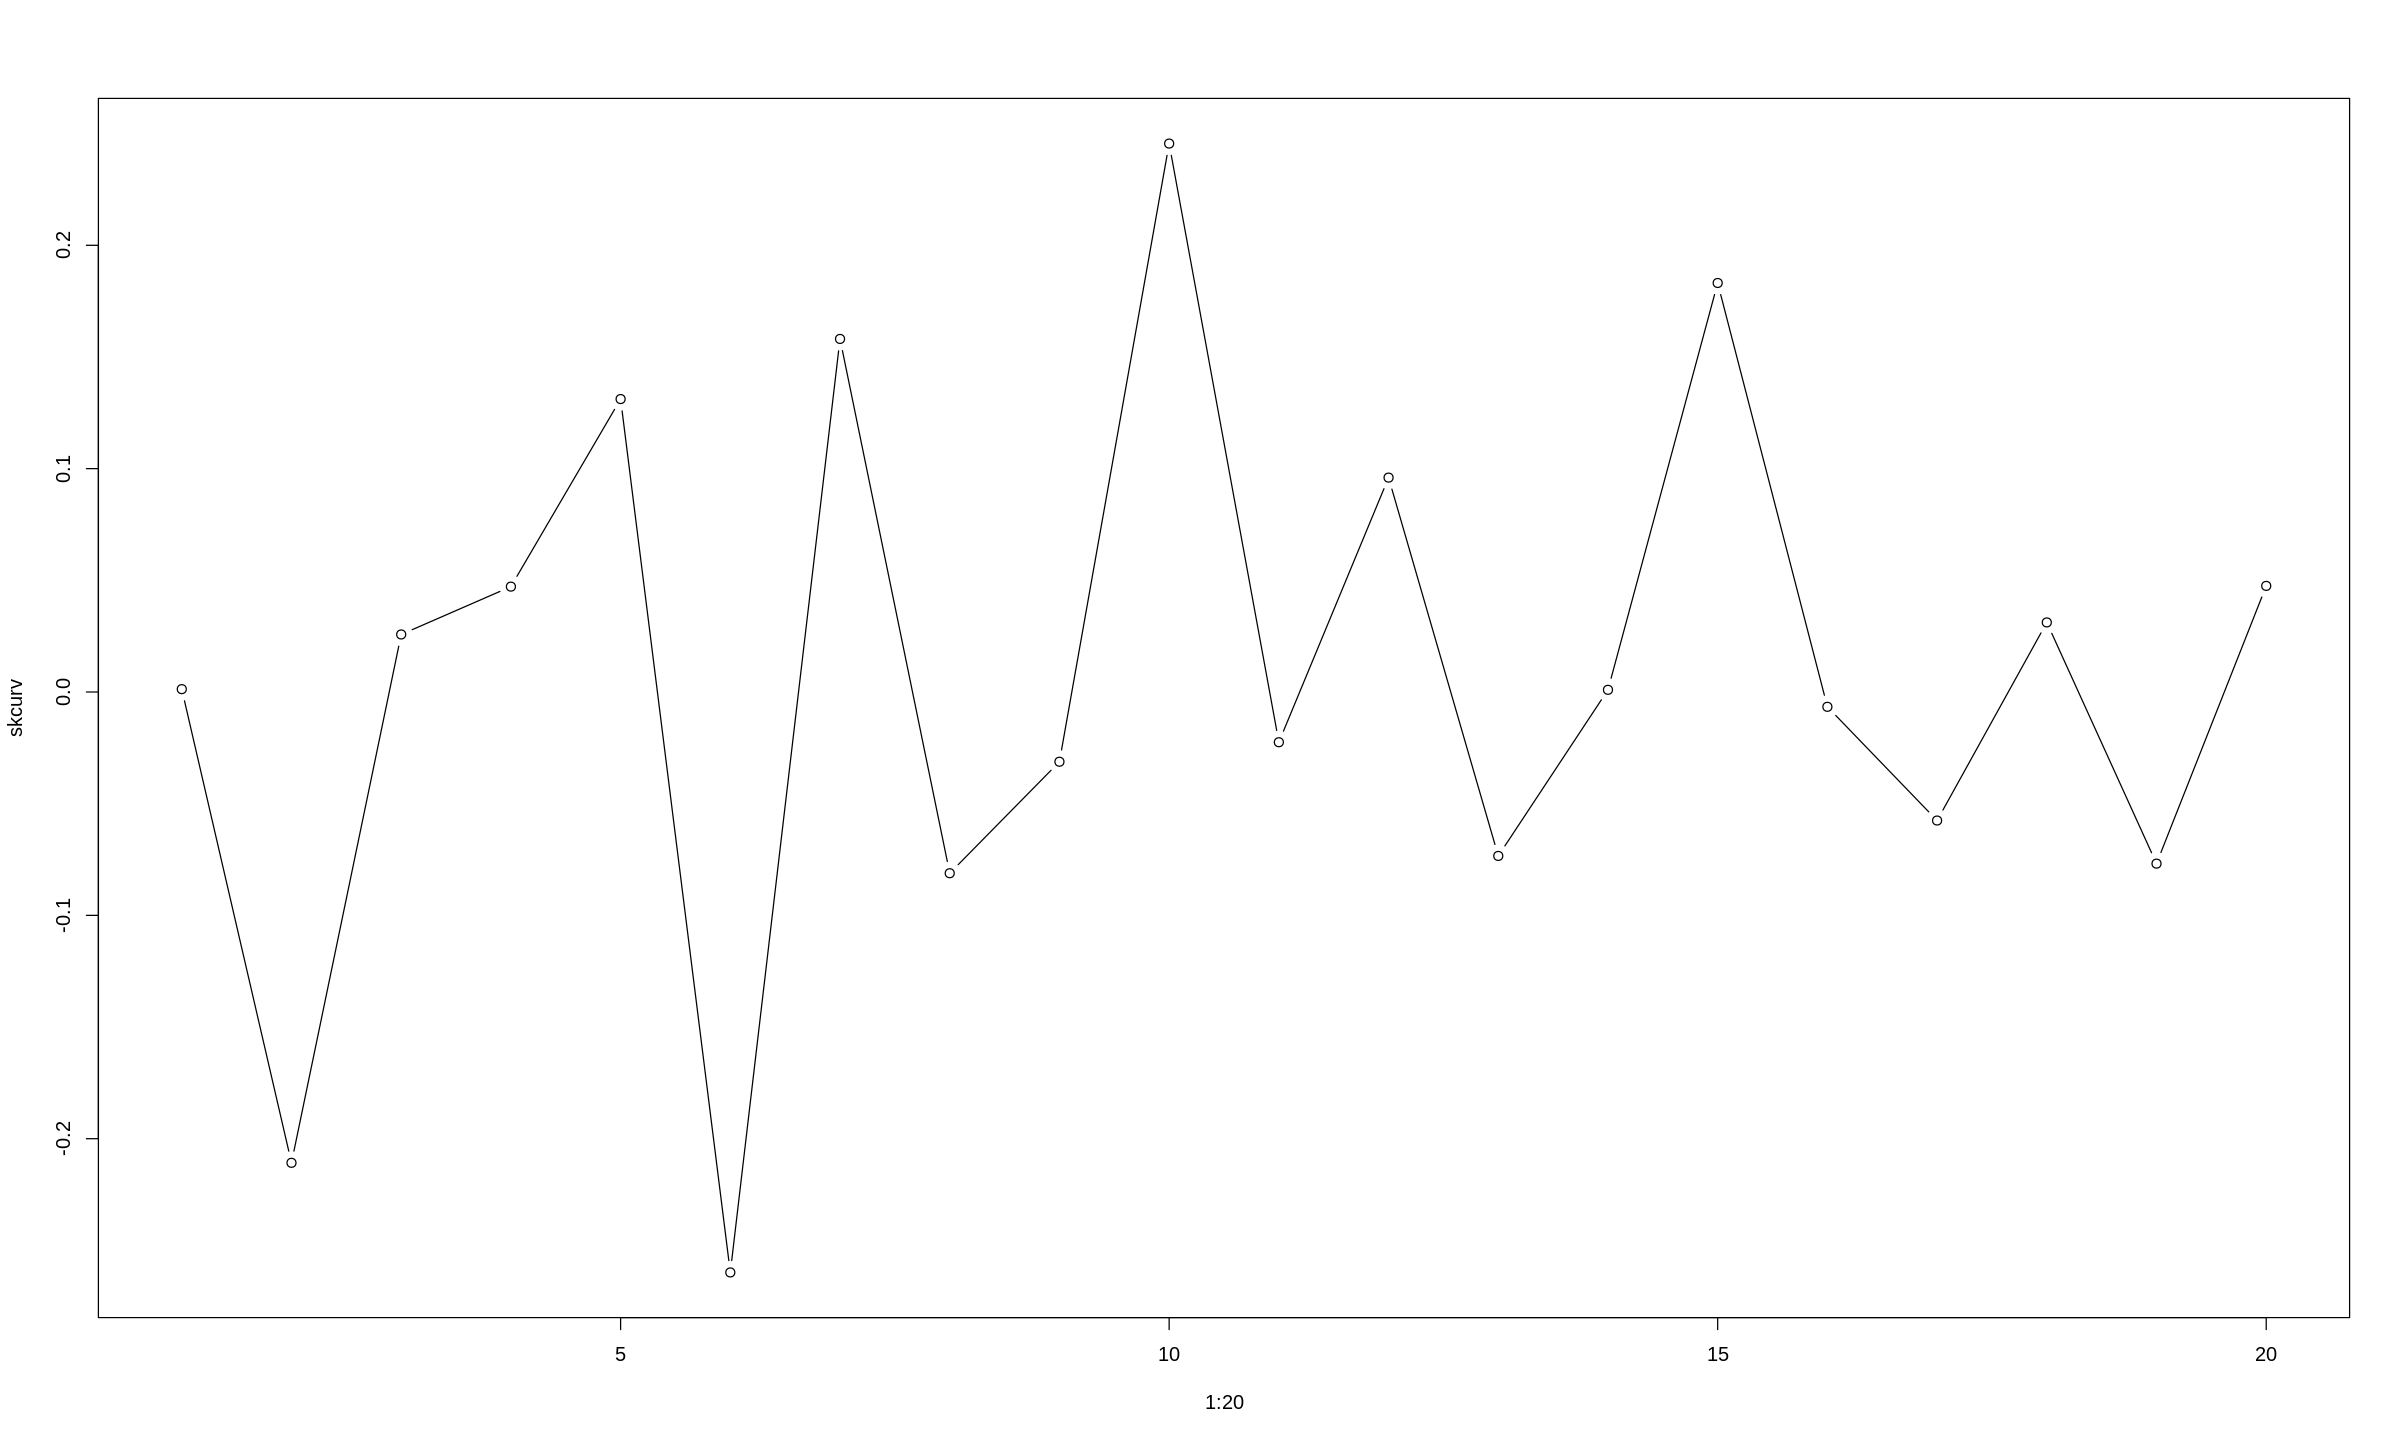

In [102]:
fordiff <- function(x) x[2:length(x)] - x[1:(length(x)-1)]
skd <- fordiff(lsar$sk)
skdd <- fordiff(skd)
skcurv <- skdd[1:20] / (1+(skd[1:20])^2)^1.5
plot( 1:20, skcurv, type="b" )

In [104]:
top( cosines( dls[,1:6], grilledMenth.LSA[1:6] ), 10 )
# elenco dei 10 documenti sopra menzionati 
variety[top( cosines( dls[,1:6], grilledMenth.LSA[1:6] ), 20 )]
reviews[top(cosines(dls[,1:6], grilledMenth.LSA[1:6]), 20)]

[1]  89782  66420  57240  93009 107112  55806  20635  94866  88489  57543

[1] "Nebbiolo"          "Nebbiolo"          "Red Blend"        
 [4] "Red Blend"         "Red Blend"         "Nebbiolo"         
 [7] "Nebbiolo"          "Nebbiolo"          "Nebbiolo"         
[10] "Nebbiolo"          "Red Blend"         "Nebbiolo"         
[13] "Sangiovese"        "Nerello Mascalese" "Nebbiolo"         
[16] "Red Blend"         "Red Blend"         "Sangiovese"       
[19] "Sangiovese"        "Nebbiolo"

[1] "A few swirls of the glass release subtle aromas of tilled soil, underbrush, violet, leather and a whiff of menthol. The firm palate offers mature black cherry, licorice and a hint of cinnamon alongside firm, fine-grained tannins."                                                             
 [2] "Aromas of underbrush, Porcini mushroom and a hint of toast emerge in the glass. The firm palate offers dried black cherry, star anise and mocha alongside assertive tannins."                                                                                                                      
 [3] "Underbrush, scorched earth, toast and crushed stone aromas emerge in the glass along with a whiff of dried herb. The firm palate doles out cherries marinated in spirits, espresso, star anise and clove alongside chewy tannins."                                                                 
 [4] "Earthy aromas of underbrush, sunbaked soil, pressed violet and dried rosemary meld together with whiffs of espresso. The firm palate offers dried Marasca cherry, cranberry, star anise and a gamy note alongside close-grained tannins."                                                          
 [5] "Earthy aromas of underbrush, sunbaked soil, pressed violet and dried rosemary meld together with whiffs of espresso. The firm palate offers dried Marasca cherry, cranberry, star anise and a gamy note alongside close-grained tannins."                                                          
 [6] "This mountain Nebbiolo opens with aromas of forest floor, violet, menthol and a whiff of scorched earth. The taut palate offers dried black cherry, ground pepper and star anise alongside austere tannins that grip the finish."                                                                  
 [7] "This straightforward Barolo opens with aromas of rose, leather and menthol. The palate doles out sour cherry, crushed raspberry, cinnamon, clove and grilled sage alongside velvety tannins. There's not much complexity but it's savory and already enjoyable. Drink through 2019."               
 [8] "Alluring scents of rose, clove, exotic spice and a balsamic note of menthol take shape in the glass. The savory, structured palate doles out raspberry compote, black cherry, licorice and an espresso note alongside a backbone of firm but refined tannins. Don't even attempt this before 2020."
 [9] "Menthol, mint, leather, forest floor and a balsamic note lead the way. The firm palate offers dried cherry, anise, bitter chocolate, chopped herb and clove alongside assertive tannins."                                                                                                          
[10] "Aromas of dried rose, menthol, espresso and mature berry lift out of the glass. The linear, tightly wound palate offers dried red cherry, cranberry and star anise alongside firm fine-grained tannins."                                                                                           
[11] "Aromas of chopped herb, ground peppercorn, exotic spice and a balsamic note lift out of the glass. The taut palate offers dark cherry, raspberry, cinnamon and licorice alongside austere, fine-grained tannins."                                                                                  
[12] "Aromas of licorice, tilled soil, leather, underbrush, blackberry, camphor and a whiff of crushed rock lead the way. On the silky, gracious palate, clove, star anise and a hint of graphite back up a core of mature cherry while lithe tannins offer polished support."                           
[13] "Leafy underbrush, sunbaked earth, star anise and a whiff of new leather lead the way. The firm, elegantly structured palate offers mature wild cherry, crushed raspberry, licorice and clove alongside a backbone of firm, rounded tannins. Drink 2018–2025."                                      
[14] "Vibrant and savory, this delivers wild cherry, dark raspberry, rosemary, mint and Mediterranean herb flavors alongside fi